# **Personal Portfolio Optimization**

## This is going to showcase the outcomes of investing $150,000 in stocks vs crypto in various market scenarios

### I) Importing Packages & Stock Data

In [141]:
# Importing Packages
import pandas as pd
import pandas_datareader as pdr
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Importing dark theme for plots
__import__ ('jupyterthemes').jtplot.style()

# Changing formatting for floats to suppress scientific notation
pd.set_option('display.float_format', lambda x:'%.2f' % x)

In [142]:
# Setting dates for our stocks data
st_StartDate = '2021-07-01'
st_EndDate = '2022-07-01'
# End date must be on a weekday (since the stock market is only open M-F)

# Setting our list of variables for our Stocks Portfolio List
AMD = pdr.DataReader('AMD','yahoo',st_StartDate,st_EndDate)
AAPL = pdr.DataReader('AAPL','yahoo',st_StartDate,st_EndDate)
MSFT = pdr.DataReader('MSFT','yahoo',st_StartDate,st_EndDate)
ORCL = pdr.DataReader('ORCL','yahoo',st_StartDate,st_EndDate)
TSLA = pdr.DataReader('TSLA','yahoo',st_StartDate,st_EndDate)
AMZN = pdr.DataReader('AMZN','yahoo',st_StartDate,st_EndDate)
GOOG = pdr.DataReader('GOOG','yahoo',st_StartDate,st_EndDate)
META = pdr.DataReader('META','yahoo',st_StartDate,st_EndDate)

In [143]:
# Setting dates for our crypto data
cr_StartDate = '2021-07-01'
cr_EndDate = '2022-06-30'
# End date must be on 2022-06-30 instead of 2022-07-01 due to the crypto market's offset (since the crypto market runs 24/7, not only M-F)

# Setting our list of variables for our Crypto Portfolio List
BTC = pdr.DataReader('BTC-USD','yahoo',cr_StartDate,cr_EndDate)
ETH = pdr.DataReader('ETH-USD','yahoo',cr_StartDate,cr_EndDate)
ADA = pdr.DataReader('ADA-USD','yahoo',cr_StartDate,cr_EndDate)
SOL = pdr.DataReader('SOL-USD','yahoo',cr_StartDate,cr_EndDate)
MATIC = pdr.DataReader('MATIC-USD','yahoo',cr_StartDate,cr_EndDate)
MANA = pdr.DataReader('MANA-USD','yahoo',cr_StartDate,cr_EndDate)
ENJ = pdr.DataReader('ENJ-USD','yahoo',cr_StartDate,cr_EndDate)
VET = pdr.DataReader('VET-USD','yahoo',cr_StartDate,cr_EndDate)

In [144]:
# Setting dates for our SPY data
spy_StartDate = '2021-07-01'
spy_EndDate = '2022-07-01'

# Setting our SPY variable for our ETF Portfolio List
SPY = pdr.DataReader('SPY','yahoo',st_StartDate,st_EndDate)

In [145]:
# Creating lists of our stocks and cryptos to analyze
StockPortfolioList=[AMD,AAPL,MSFT,ORCL,TSLA,AMZN,GOOG,META]
CryptoPortfolioList=[BTC,ETH,ADA,SOL,MATIC,MANA,ENJ,VET]

# Creating "list" for SPY to mirror data process
SpyPortfolioList=[SPY]

In [146]:
# Examining the initial data from a random stock in our portfolio
GOOG.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-07-01,2529.25,2497.00,2497.00,2527.37,856000,2527.37
2021-07-02,2576.96,2535.38,2536.79,2574.38,1058000,2574.38
2021-07-06,2597.69,2568.18,2588.99,2595.42,1067500,2595.42
2021-07-07,2612.80,2595.20,2606.82,2601.55,834000,2601.55
2021-07-08,2600.65,2560.80,2565.00,2583.54,989000,2583.54


In [147]:
# Examining the initial data from a random crypto in our portfolio
ETH.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-07-01,2274.40,2081.08,2274.40,2113.61,29061701793,2113.61
2021-07-02,2155.60,2021.82,2109.89,2150.04,31796212554,2150.04
2021-07-03,2237.57,2117.59,2150.83,2226.11,17433361641,2226.11
2021-07-04,2384.29,2190.84,2226.55,2321.72,18787107473,2321.72
2021-07-05,2321.92,2163.04,2321.92,2198.58,20103794829,2198.58


In [148]:
# Examining the initial data from our SPY df
SPY.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-07-01,430.60,428.80,428.87,430.43,53441000.00,424.40
2021-07-02,434.10,430.52,431.67,433.72,57697700.00,427.64
2021-07-06,434.01,430.01,433.78,432.93,68710400.00,426.86
2021-07-07,434.76,431.51,433.66,434.46,63549500.00,428.37
2021-07-08,431.73,427.52,428.78,430.92,97595200.00,424.88


In [149]:
# Viewing the first value for each of our cryptos to determine best start date
# Meant to operate on macro-scale date range (where crypto dates != 2021-07-01 : 2022-06-30)
print('BTC i[0] Values:\n',BTC.iloc[0],'\n\n',
      'ETH i[0] Values:\n',ETH.iloc[0],'\n\n',
      'ADA i[0] Values:\n',ADA.iloc[0],'\n\n',
      'SOL i[0] Values:\n',SOL.iloc[0],'\n\n',
      'MATIC i[0] Values:\n',MATIC.iloc[0],'\n\n',
      'MANA i[0] Values:\n',MANA.iloc[0],'\n\n',
      'ENJ i[0] Values:\n',ENJ.iloc[0],'\n\n',
      'VET i[0] Values:\n',VET.iloc[0])

BTC i[0] Values:
 High              35035.98
Low               32883.78
Open              35035.98
Close             33572.12
Volume      37838957079.00
Adj Close         33572.12
Name: 2021-07-01 00:00:00, dtype: float64 

 ETH i[0] Values:
 High               2274.40
Low                2081.08
Open               2274.40
Close              2113.61
Volume      29061701793.00
Adj Close          2113.61
Name: 2021-07-01 00:00:00, dtype: float64 

 ADA i[0] Values:
 High                 1.38
Low                  1.30
Open                 1.38
Close                1.34
Volume      2002167965.00
Adj Close            1.34
Name: 2021-07-01 00:00:00, dtype: float64 

 SOL i[0] Values:
 High               35.54
Low                32.39
Open               35.51
Close              33.40
Volume      474665321.00
Adj Close          33.40
Name: 2021-07-01 00:00:00, dtype: float64 

 MATIC i[0] Values:
 High                1.17
Low                 1.06
Open                1.17
Close               1.0

# **II) Calculating Performance Metrics & Plotting**

In [150]:
# Adding a Normalizing Return column, which shows us the value of the stock compared to the initial date that we bought it
for stock in StockPortfolioList:
    stock["Normalizing Return"] = stock["Adj Close"]/stock.iloc[0]["Adj Close"]

In [151]:
# Adding a Normalizing Return column, which shows us the value of the crypto compared to the initial date that we bought it
for crypto in CryptoPortfolioList:
    crypto["Normalizing Return"] = crypto["Adj Close"]/crypto.iloc[0]["Adj Close"]

In [152]:
# Adding a Normalizing Return column, which shows us the value of the SPY compared to the initial date that we bought it
for etf in SpyPortfolioList:
    etf["Normalizing Return"] = etf["Adj Close"]/etf.iloc[0]["Adj Close"]

In [153]:
# Efficiently checking if our new column was added correctly per dataframe
print("Shape of Stock Dataframe:",stock.shape, "\nShape of Crypto Dataframe:",crypto.shape,"\nShape of SPY Dataframe:",etf.shape)

Shape of Stock Dataframe: (253, 7) 
Shape of Crypto Dataframe: (366, 7) 
Shape of SPY Dataframe: (253, 7)


In [154]:
# Checking that our new column is working correctly
TSLA.head()

,High,Low,Open,Close,Volume,Adj Close,Normalizing Return
Date,,,,,,,
2021-07-01,687.99,672.80,683.92,677.92,18634500,677.92,1.00
2021-07-02,700.00,673.26,678.98,678.90,27054500,678.90,1.00
2021-07-06,684.00,651.40,681.71,659.58,23284500,659.58,0.97
2021-07-07,665.70,638.32,664.27,644.65,18792000,644.65,0.95
2021-07-08,654.43,620.46,628.37,652.81,22773300,652.81,0.96


In [155]:
# Allocating equal weights of 12.5% per stock in our PortfolioList using the zip function
# (100% of capital / 8 stocks = 12.5% capital allocation per stock)
for stock, allo in zip((StockPortfolioList),[0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.125]):
    stock ["Allocation"] = stock["Normalizing Return"] * allo

for crypto, allo in zip((CryptoPortfolioList),[0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.125]):
    crypto ["Allocation"] = crypto["Normalizing Return"] * allo

for etf, allo in zip((SpyPortfolioList),[1]):
    etf ["Allocation"] = etf["Normalizing Return"] * allo

In [156]:
# Examining various allocations and their fluctuations per stock, crypto, and etf
# Our Allocation column also calculates each stock's return with a 12.5% allocated weight
MSFT.head()

,High,Low,Open,Close,Volume,Adj Close,Normalizing Return,Allocation
Date,,,,,,,,
2021-07-01,271.84,269.60,269.61,271.60,16725300.00,269.40,1.00,0.12
2021-07-02,278.00,272.50,272.82,277.65,26458000.00,275.40,1.02,0.13
2021-07-06,279.37,274.30,278.03,277.66,31565600.00,275.41,1.02,0.13
2021-07-07,280.69,277.15,279.40,279.93,23260000.00,277.66,1.03,0.13
2021-07-08,278.73,274.87,276.90,277.42,24618600.00,275.17,1.02,0.13


In [157]:
ETH.head()

,High,Low,Open,Close,Volume,Adj Close,Normalizing Return,Allocation
Date,,,,,,,,
2021-07-01,2274.40,2081.08,2274.40,2113.61,29061701793,2113.61,1.00,0.12
2021-07-02,2155.60,2021.82,2109.89,2150.04,31796212554,2150.04,1.02,0.13
2021-07-03,2237.57,2117.59,2150.83,2226.11,17433361641,2226.11,1.05,0.13
2021-07-04,2384.29,2190.84,2226.55,2321.72,18787107473,2321.72,1.10,0.14
2021-07-05,2321.92,2163.04,2321.92,2198.58,20103794829,2198.58,1.04,0.13


In [158]:
SPY.head()

,High,Low,Open,Close,Volume,Adj Close,Normalizing Return,Allocation
Date,,,,,,,,
2021-07-01,430.60,428.80,428.87,430.43,53441000.00,424.40,1.00,1.00
2021-07-02,434.10,430.52,431.67,433.72,57697700.00,427.64,1.01,1.01
2021-07-06,434.01,430.01,433.78,432.93,68710400.00,426.86,1.01,1.01
2021-07-07,434.76,431.51,433.66,434.46,63549500.00,428.37,1.01,1.01
2021-07-08,431.73,427.52,428.78,430.92,97595200.00,424.88,1.00,1.00


In [159]:
# Assigning a value of $150,000 to our stock portfolio
for stock in StockPortfolioList:
    stock["Position Value"] = stock["Allocation"] * 150000

# Assigning a value of $150,000 to our crypto portfolio
for crypto in CryptoPortfolioList:
    crypto["Position Value"] = crypto["Allocation"] * 150000

# Assigning a value of $150,000 to our etf portfolio
for etf in SpyPortfolioList:
    etf["Position Value"] = etf["Allocation"] * 150000

In [160]:
etf.head()

,High,Low,Open,Close,Volume,Adj Close,Normalizing Return,Allocation,Position Value
Date,,,,,,,,,
2021-07-01,430.60,428.80,428.87,430.43,53441000.00,424.40,1.00,1.00,150000.00
2021-07-02,434.10,430.52,431.67,433.72,57697700.00,427.64,1.01,1.01,151146.53
2021-07-06,434.01,430.01,433.78,432.93,68710400.00,426.86,1.01,1.01,150871.22
2021-07-07,434.76,431.51,433.66,434.46,63549500.00,428.37,1.01,1.01,151404.41
2021-07-08,431.73,427.52,428.78,430.92,97595200.00,424.88,1.00,1.00,150170.77


In [161]:
# Examining multiple heads and position values
TSLA.head()

,High,Low,Open,Close,Volume,Adj Close,Normalizing Return,Allocation,Position Value
Date,,,,,,,,,
2021-07-01,687.99,672.80,683.92,677.92,18634500,677.92,1.00,0.12,18750.00
2021-07-02,700.00,673.26,678.98,678.90,27054500,678.90,1.00,0.13,18777.11
2021-07-06,684.00,651.40,681.71,659.58,23284500,659.58,0.97,0.12,18242.75
2021-07-07,665.70,638.32,664.27,644.65,18792000,644.65,0.95,0.12,17829.82
2021-07-08,654.43,620.46,628.37,652.81,22773300,652.81,0.96,0.12,18055.50


In [162]:
META.head()

,High,Low,Open,Close,Volume,Adj Close,Normalizing Return,Allocation,Position Value
Date,,,,,,,,,
2021-07-01,354.67,346.50,346.82,354.39,17137000,354.39,1.00,0.12,18750.00
2021-07-02,356.44,352.62,355.10,354.70,11521300,354.70,1.00,0.13,18766.40
2021-07-06,358.79,349.18,356.50,352.78,13488500,352.78,1.00,0.12,18664.82
2021-07-07,356.49,350.00,355.26,350.49,14218900,350.49,0.99,0.12,18543.66
2021-07-08,348.33,342.56,345.73,345.65,14406500,345.65,0.98,0.12,18287.58


In [163]:
SPY.head()

,High,Low,Open,Close,Volume,Adj Close,Normalizing Return,Allocation,Position Value
Date,,,,,,,,,
2021-07-01,430.60,428.80,428.87,430.43,53441000.00,424.40,1.00,1.00,150000.00
2021-07-02,434.10,430.52,431.67,433.72,57697700.00,427.64,1.01,1.01,151146.53
2021-07-06,434.01,430.01,433.78,432.93,68710400.00,426.86,1.01,1.01,150871.22
2021-07-07,434.76,431.51,433.66,434.46,63549500.00,428.37,1.01,1.01,151404.41
2021-07-08,431.73,427.52,428.78,430.92,97595200.00,424.88,1.00,1.00,150170.77


In [164]:
# [1/3] Creating a new dataframe of all position values for plotting stock data
st_position_values = [
    AMD["Position Value"],
    AAPL["Position Value"],
    MSFT["Position Value"],
    ORCL["Position Value"],
    TSLA["Position Value"],
    AMZN["Position Value"],
    GOOG["Position Value"],
    META["Position Value"]
]

# Concatenating the list of all values in the Position Values column
st_position_values = pd.concat(st_position_values, axis = 1)

# Naming all columns with their respective stock names
st_position_values.columns = ["AMD","AAPL","MSFT","ORCL","TSLA","AMZN","GOOG","META"]

# Adding a total position values column
st_position_values["Total"] = st_position_values.sum(axis = 1)

st_position_values.head()

,AMD,AAPL,MSFT,ORCL,TSLA,AMZN,GOOG,META,Total
Date,,,,,,,,,
2021-07-01,18750.00,18750.00,18750.00,18750.00,18750.00,18750.00,18750.00,18750.00,150000.00
2021-07-02,19029.31,19117.43,19167.66,19287.47,18777.11,19176.07,19098.76,18766.40,152420.21
2021-07-06,18983.09,19398.82,19168.35,19584.49,18242.75,20075.95,19254.85,18664.82,153373.11
2021-07-07,18193.39,19747.12,19325.06,20294.03,17829.82,20189.77,19300.32,18543.66,153423.18
2021-07-08,18032.63,19565.45,19151.79,20176.17,18055.50,20380.00,19166.71,18287.58,152815.85


In [165]:
# [2/3] Creating a new dataframe of all position values for plotting crypto data
cr_position_values = [
    BTC["Position Value"],
    ETH["Position Value"],
    ADA["Position Value"],
    SOL["Position Value"],
    MATIC["Position Value"],
    MANA["Position Value"],
    ENJ["Position Value"],
    VET["Position Value"]
]

# Concatenating the list of all values in the Position Values column
cr_position_values = pd.concat(cr_position_values, axis = 1)

# Naming all columns with their respective stock names
cr_position_values.columns = ["BTC","ETH","ADA","SOL","MATIC","MANA","ENJ","VET"]

# Adding a total position values column
cr_position_values["Total"] = cr_position_values.sum(axis = 1)

cr_position_values.head()

,BTC,ETH,ADA,SOL,MATIC,MANA,ENJ,VET,Total
Date,,,,,,,,,
2021-07-01,18750.00,18750.00,18750.00,18750.00,18750.00,18750.00,18750.00,18750.00,150000.00
2021-07-02,18931.47,19073.22,19575.27,19096.02,19206.92,18319.08,18353.32,19225.18,151780.48
2021-07-03,19362.36,19748.08,19749.89,19353.29,19468.44,18973.87,18782.16,19367.69,154805.78
2021-07-04,19708.20,20596.24,20470.74,19258.86,19977.10,19696.12,19147.63,19460.34,158315.23
2021-07-05,18847.12,19503.84,19722.69,18514.56,19172.09,18581.91,18082.03,18486.03,150910.27


In [166]:
# [3/3] Creating a new dataframe of position values for plotting SPY data
spy_position_values = [SPY["Position Value"]]

# Concatenating the list of all values in the Position Values column
spy_position_values = pd.concat(spy_position_values, axis = 1)

# Naming all columns with their respective stock names
spy_position_values.columns = ["SPY"]

# Adding a total position values column
spy_position_values["Total"] = spy_position_values.sum(axis = 1)

spy_position_values.head()

,SPY,Total
Date,,
2021-07-01,150000.00,150000.00
2021-07-02,151146.53,151146.53
2021-07-06,150871.22,150871.22
2021-07-07,151404.41,151404.41
2021-07-08,150170.77,150170.77


In [167]:
# Using output of .argmax() method as input of .iloc[] method
print("Index for max SPY portfolio value = i[{}] \n\nInformation for index of max SPY portfolio value: \n{}".format(
    spy_position_values['Total'].argmax(),
    spy_position_values.iloc[128])
    )

Index for max SPY portfolio value = i[128] 

Information for index of max SPY portfolio value: 
SPY     167596.63
Total   167596.63
Name: 2022-01-03 00:00:00, dtype: float64


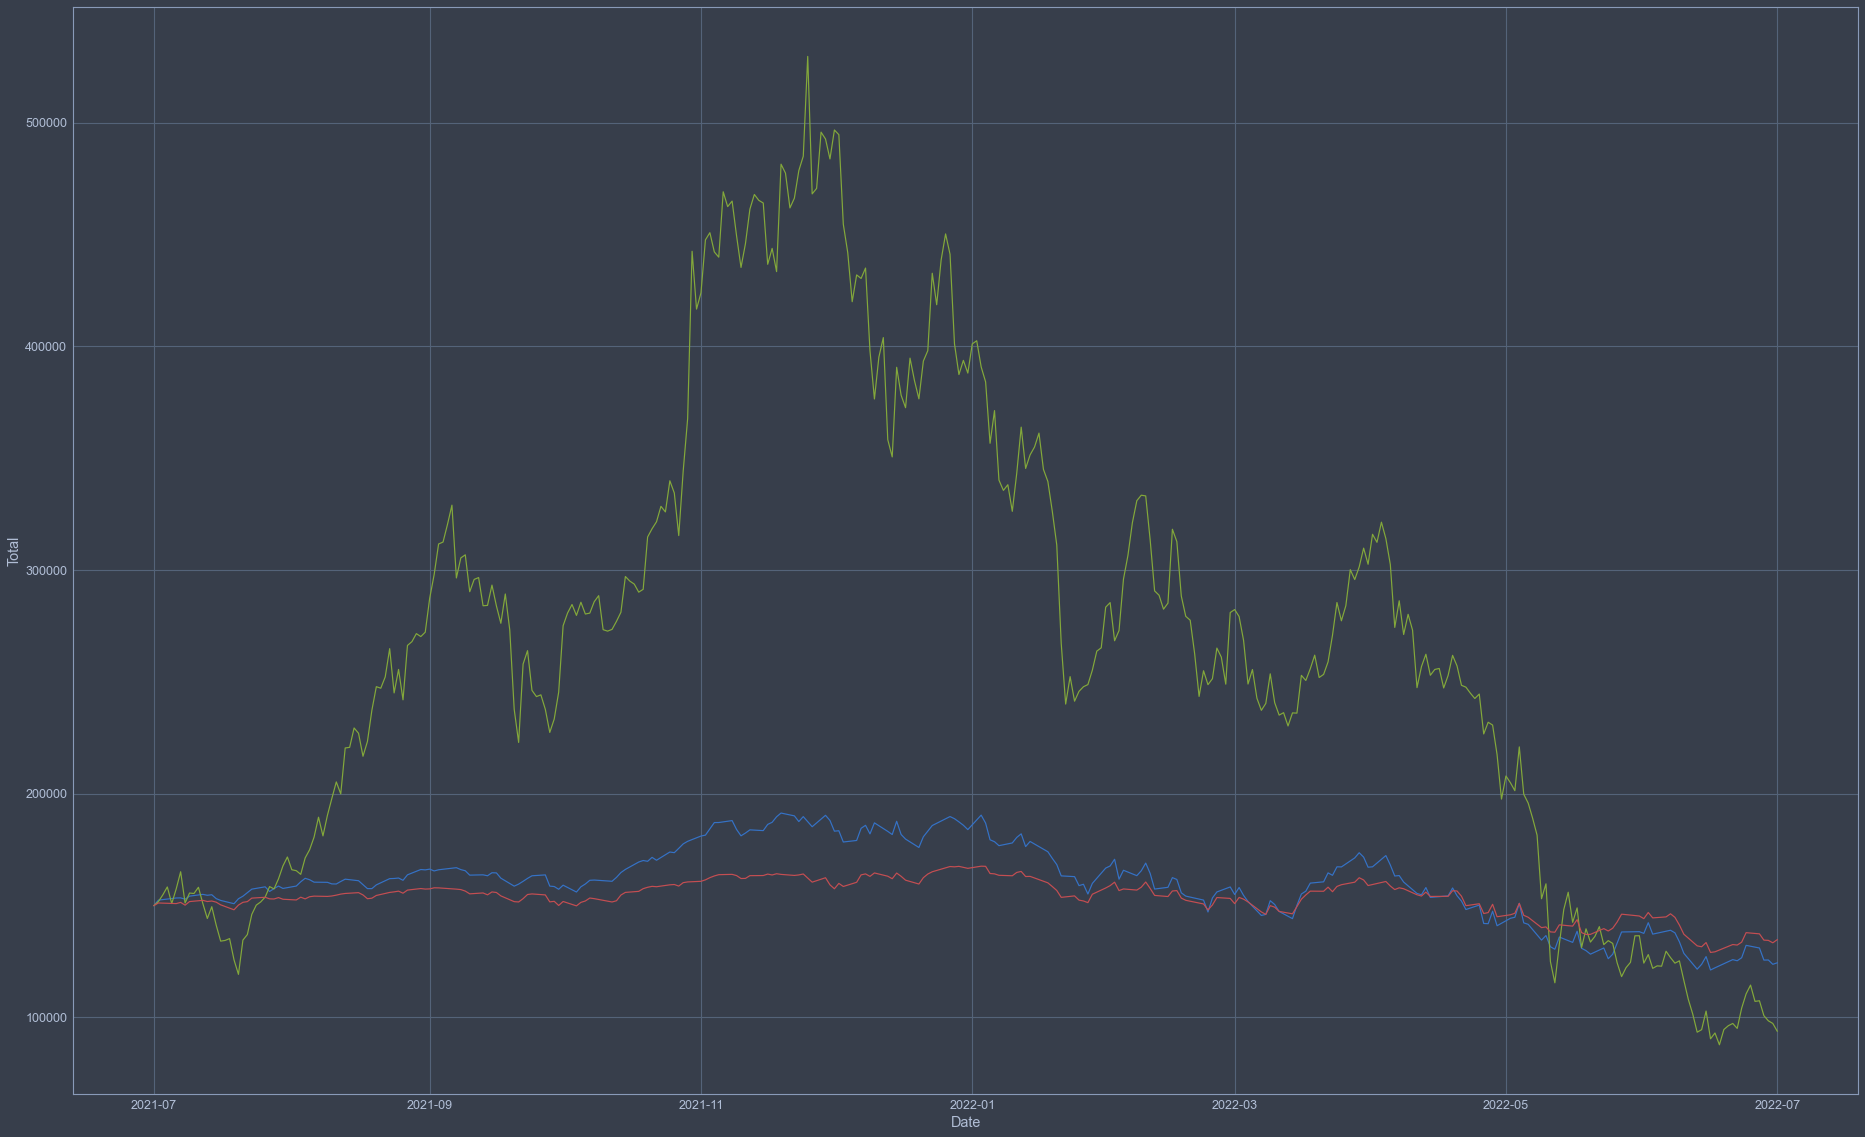

In [168]:
# Comparing views with seaborn lineplot

fig, ax = plt.subplots(figsize=(32,20))

sns.lineplot(data=st_position_values['Total']);
sns.lineplot(data=cr_position_values['Total']);
sns.lineplot(data=spy_position_values['Total']);

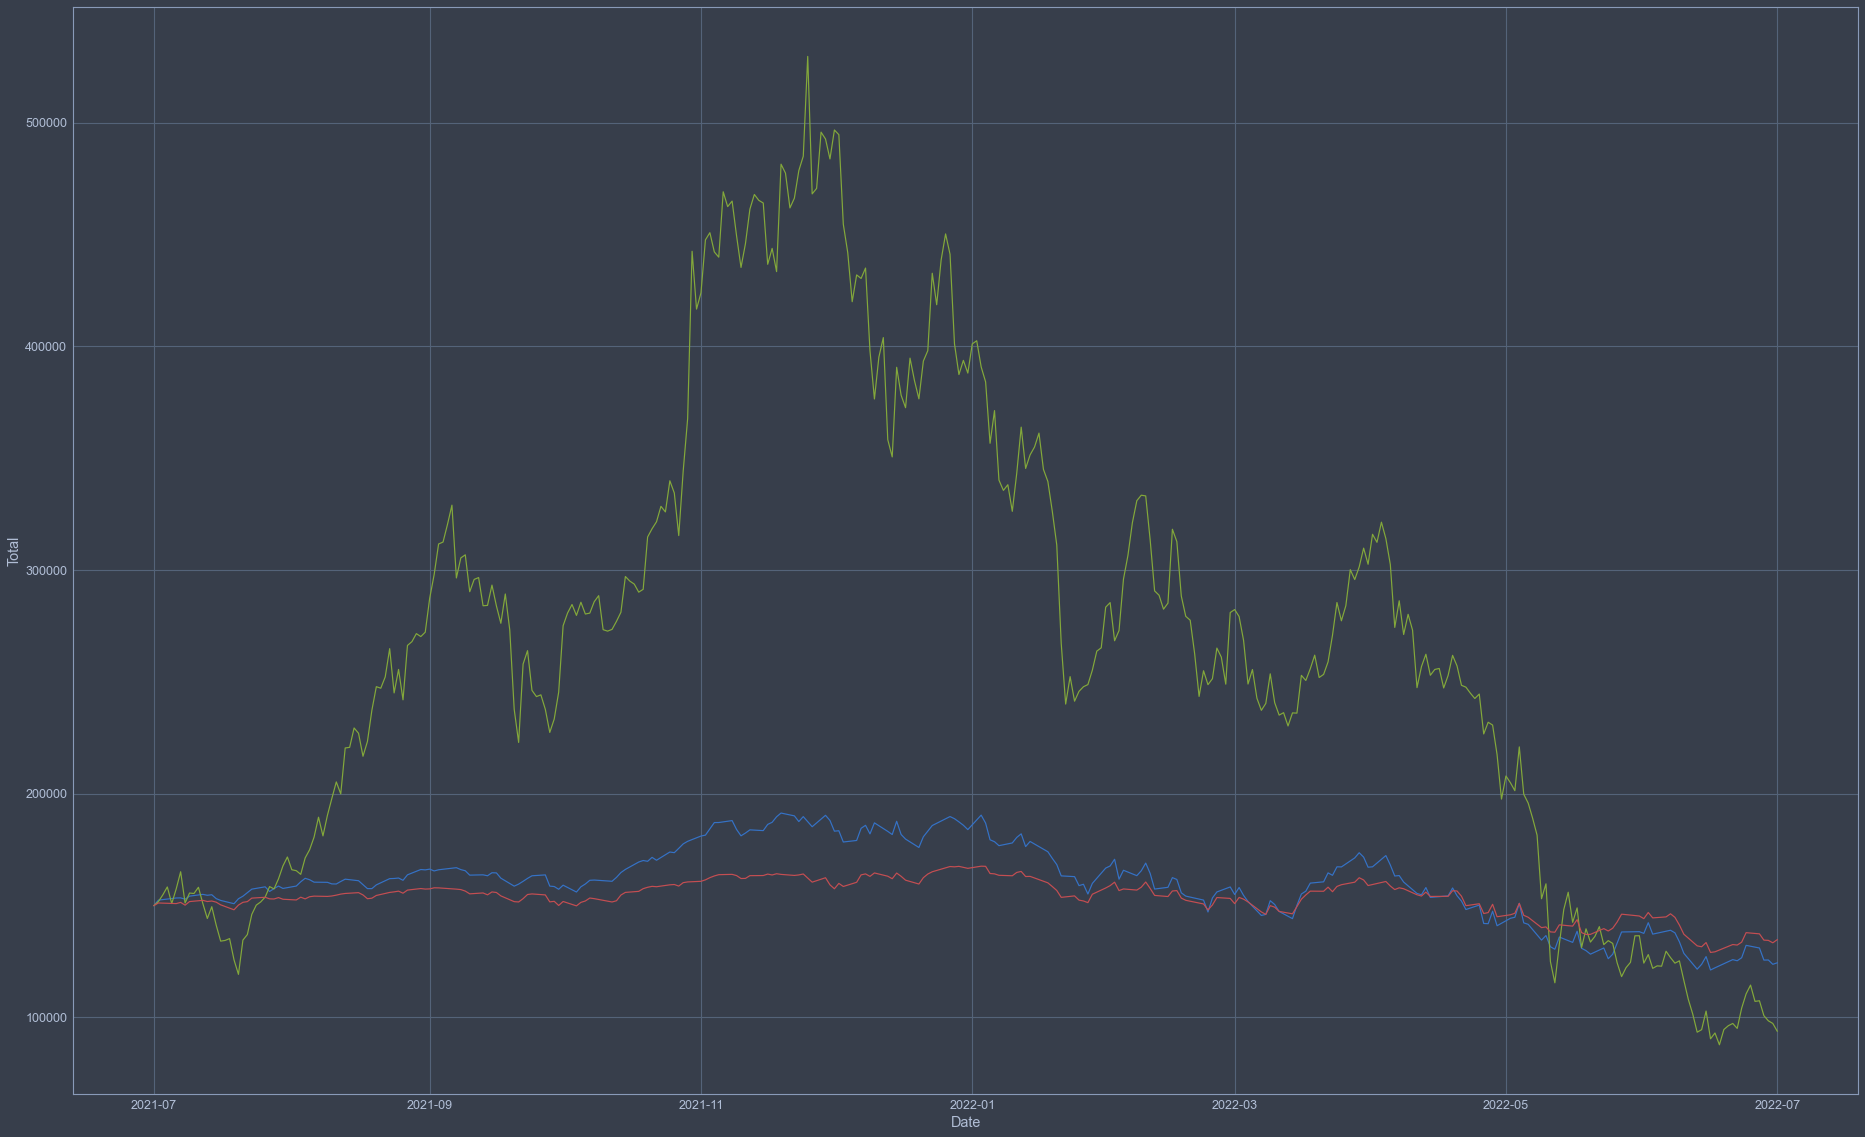

In [169]:
# Comparing views with seaborn lineplot

fig, ax = plt.subplots(figsize=(32,20))

sns.lineplot(data=st_position_values['Total']);
sns.lineplot(data=cr_position_values['Total']);
sns.lineplot(data=spy_position_values['Total']);

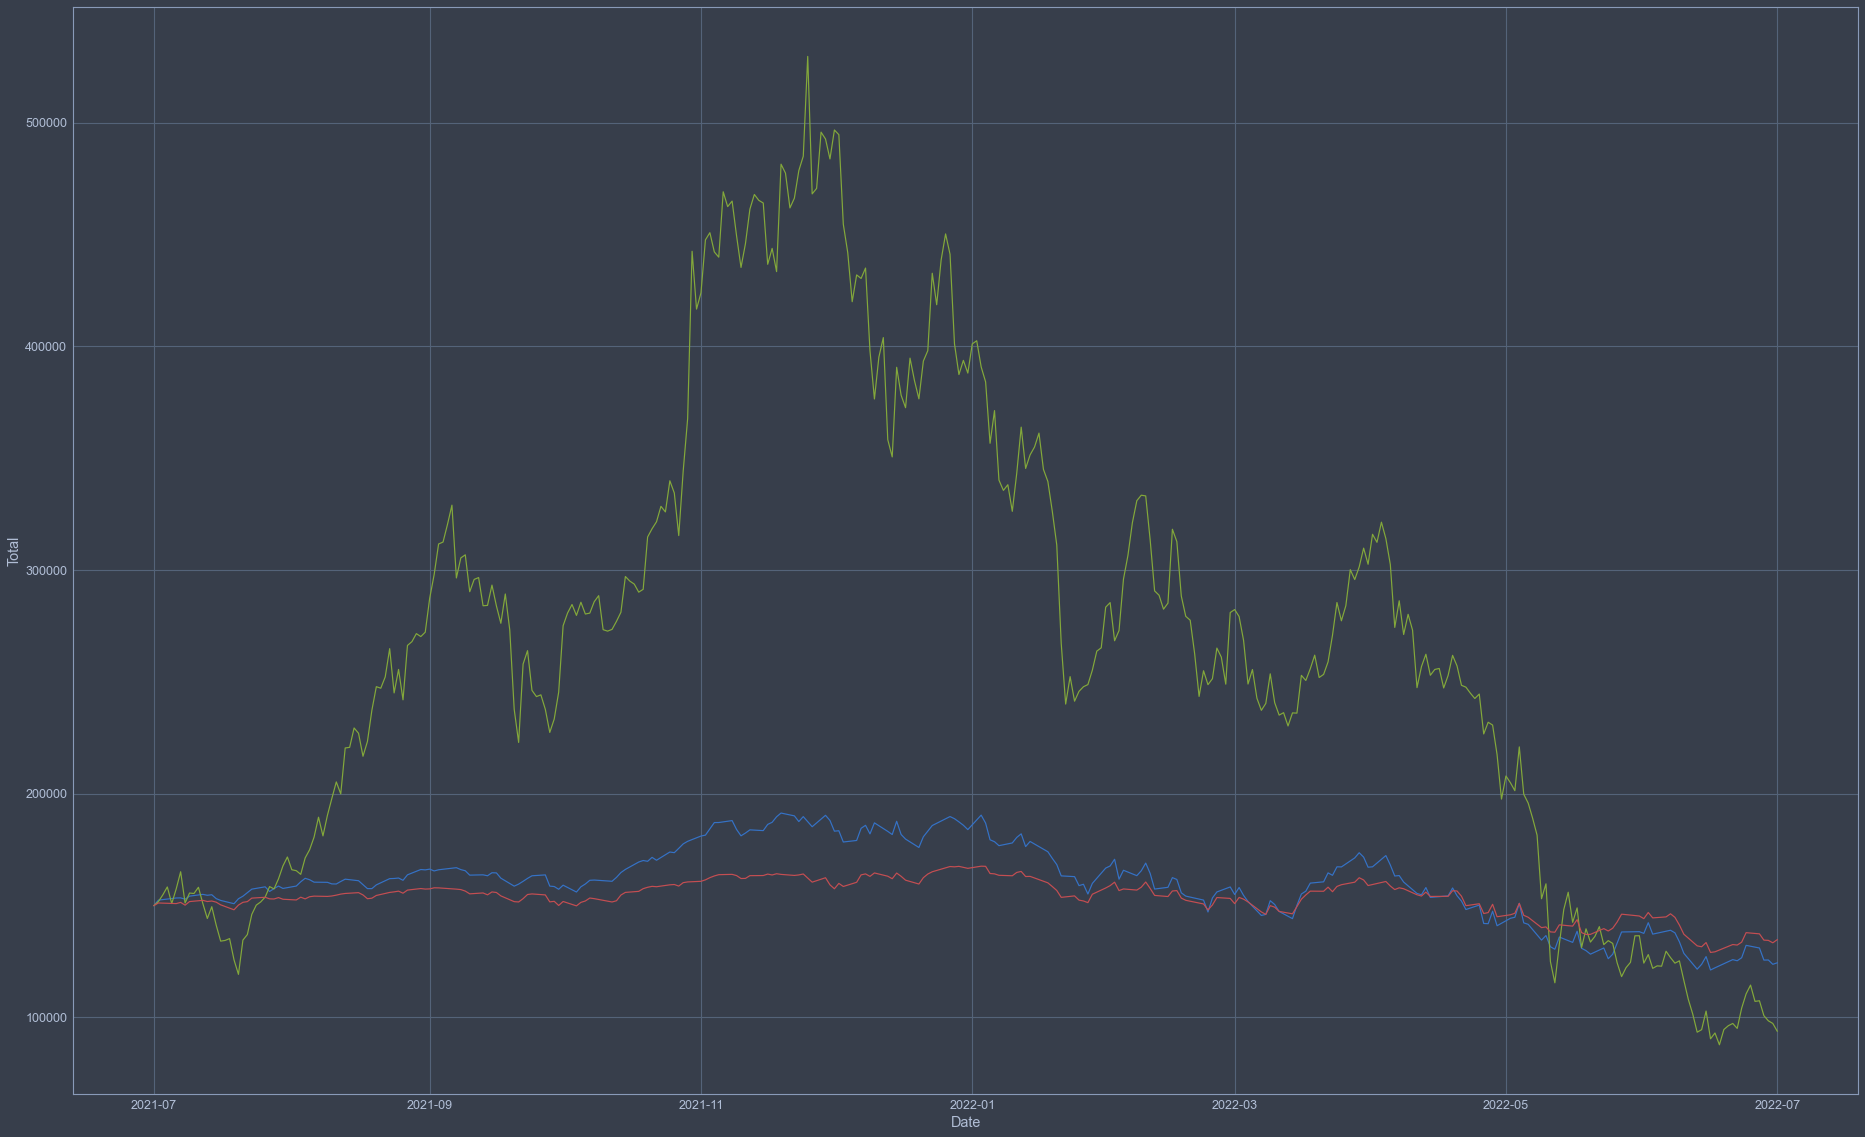

In [170]:
# Comparing views with seaborn lineplot

fig, ax = plt.subplots(figsize=(32,20))

sns.lineplot(data=st_position_values['Total']);
sns.lineplot(data=cr_position_values['Total']);
sns.lineplot(data=spy_position_values['Total']);

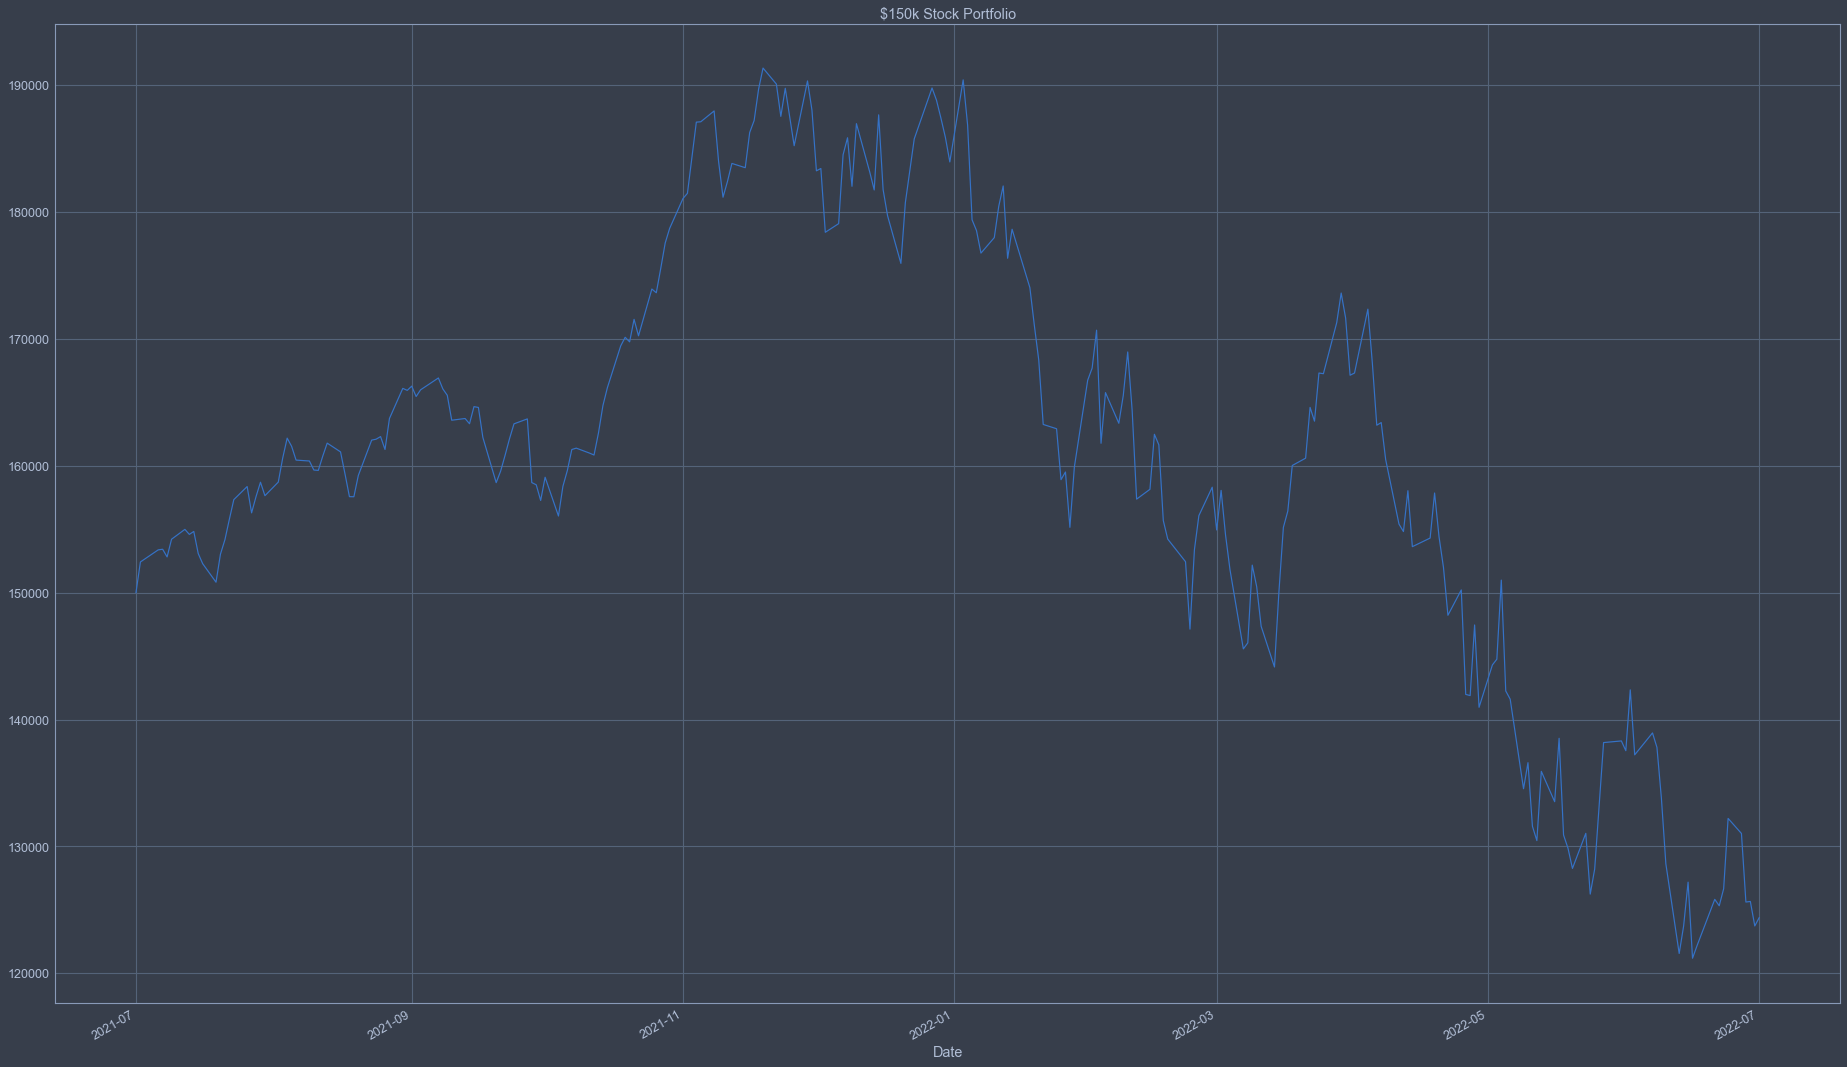

In [171]:
# Plotting our total stock portfolio
st_position_values["Total"].plot(figsize=(32,20), title="$150k Stock Portfolio");

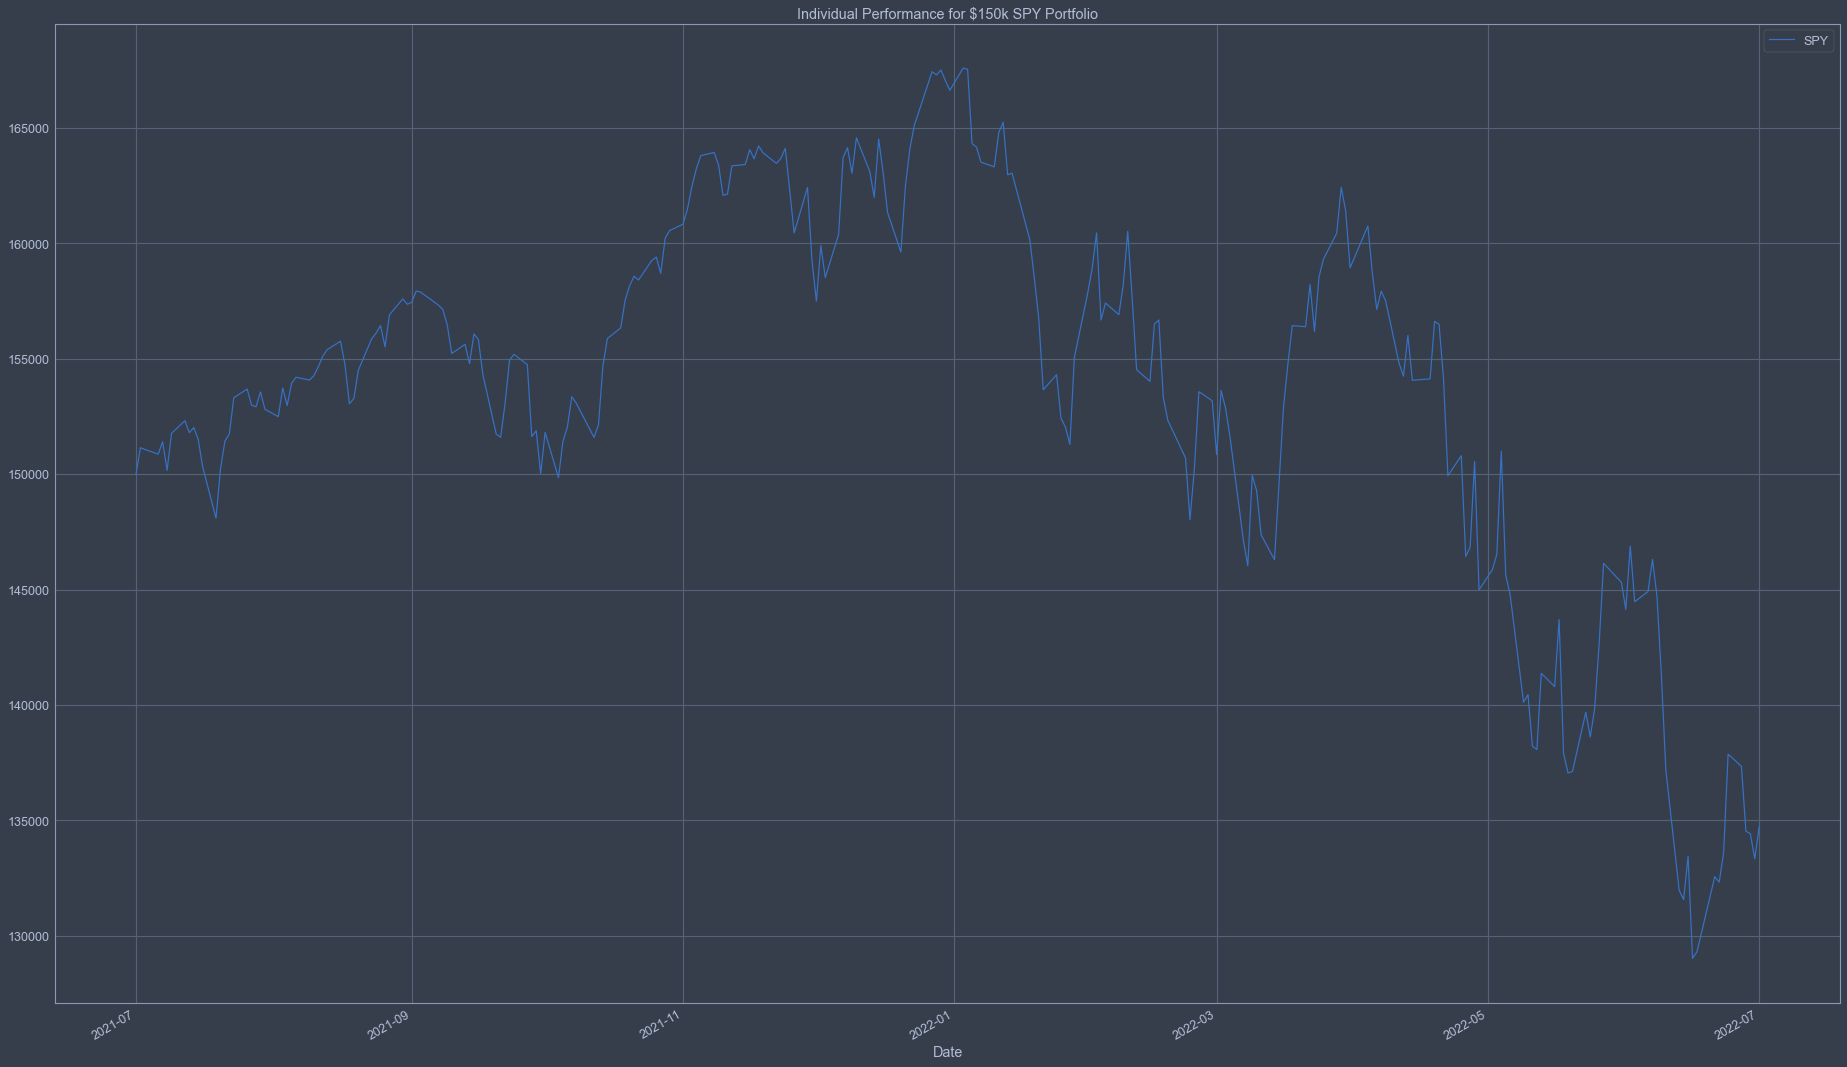

In [172]:
#Plotting our individual SPY etf within our total etf portfolio
spy_position_values.drop("Total", axis = 1).plot(figsize=(32,20), title="Individual Performance for $150k SPY Portfolio");

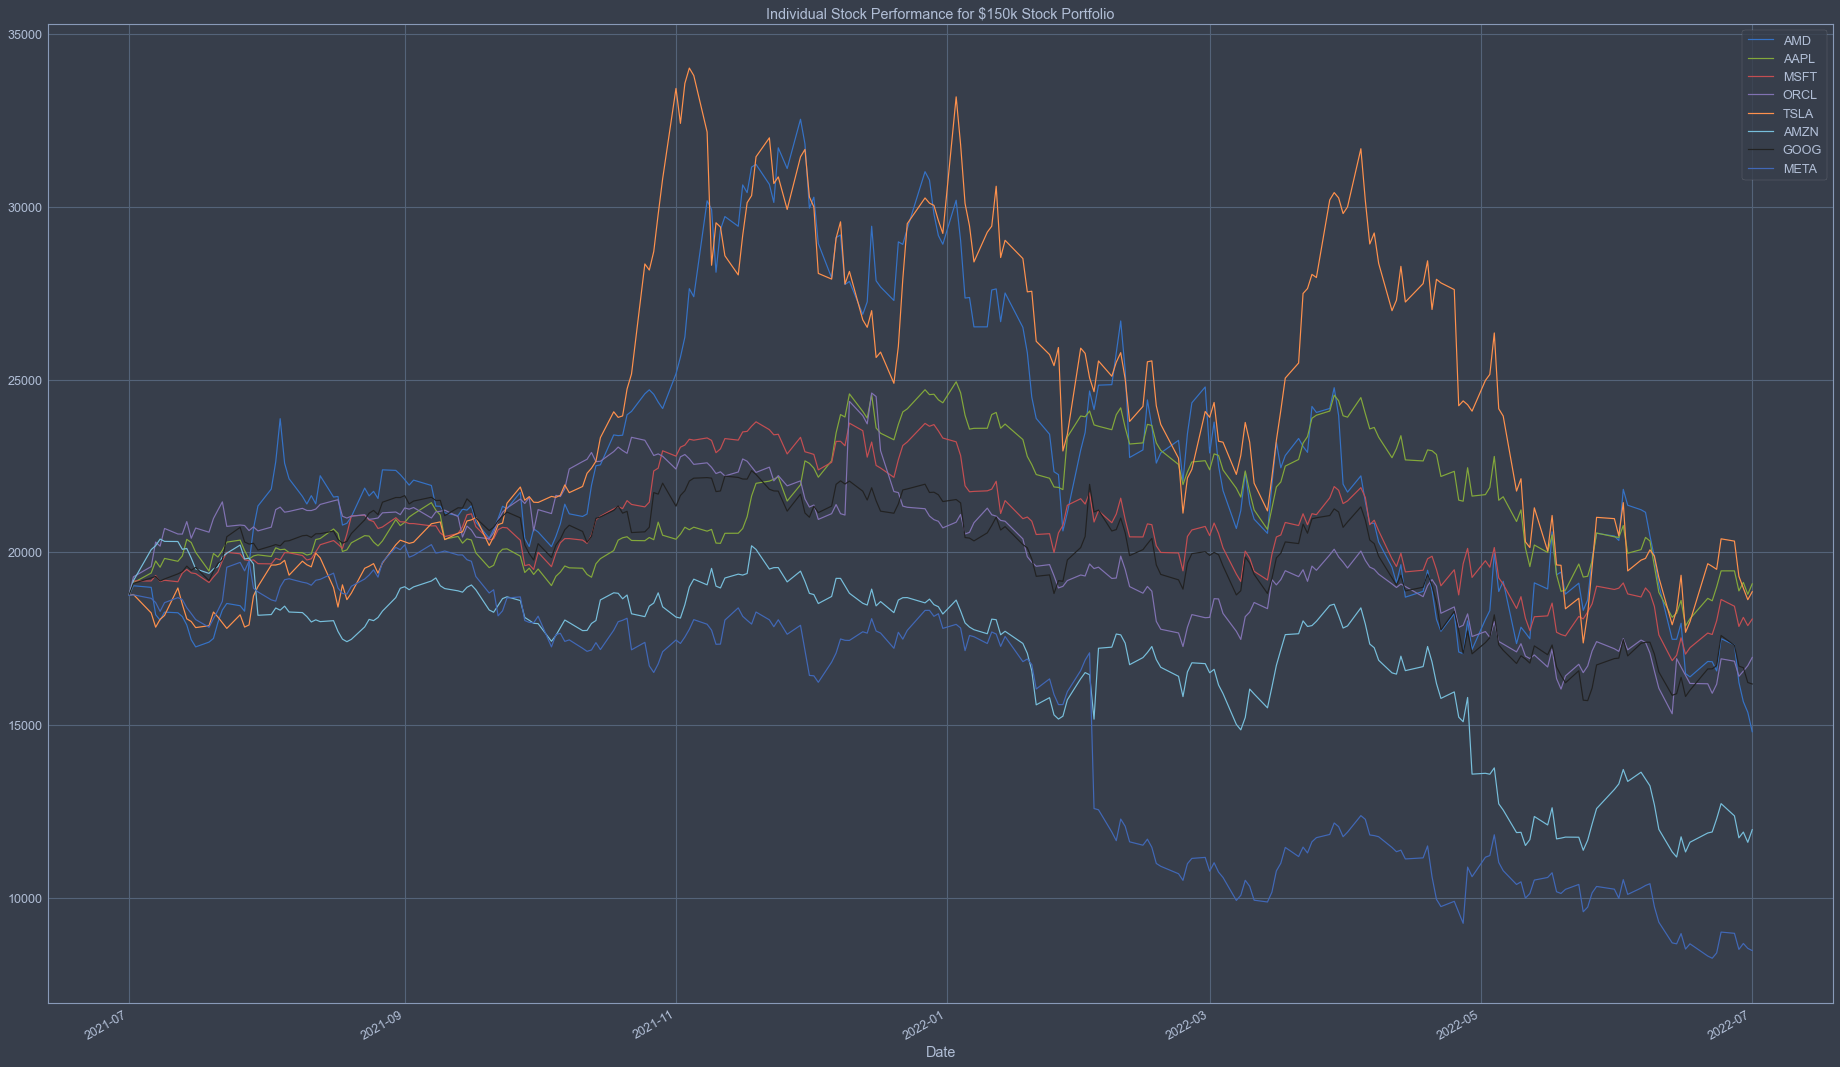

In [173]:
#Plotting each stock within our total stock portfolio
st_position_values.drop("Total", axis = 1).plot(figsize=(32,20), title="Individual Stock Performance for $150k Stock Portfolio");

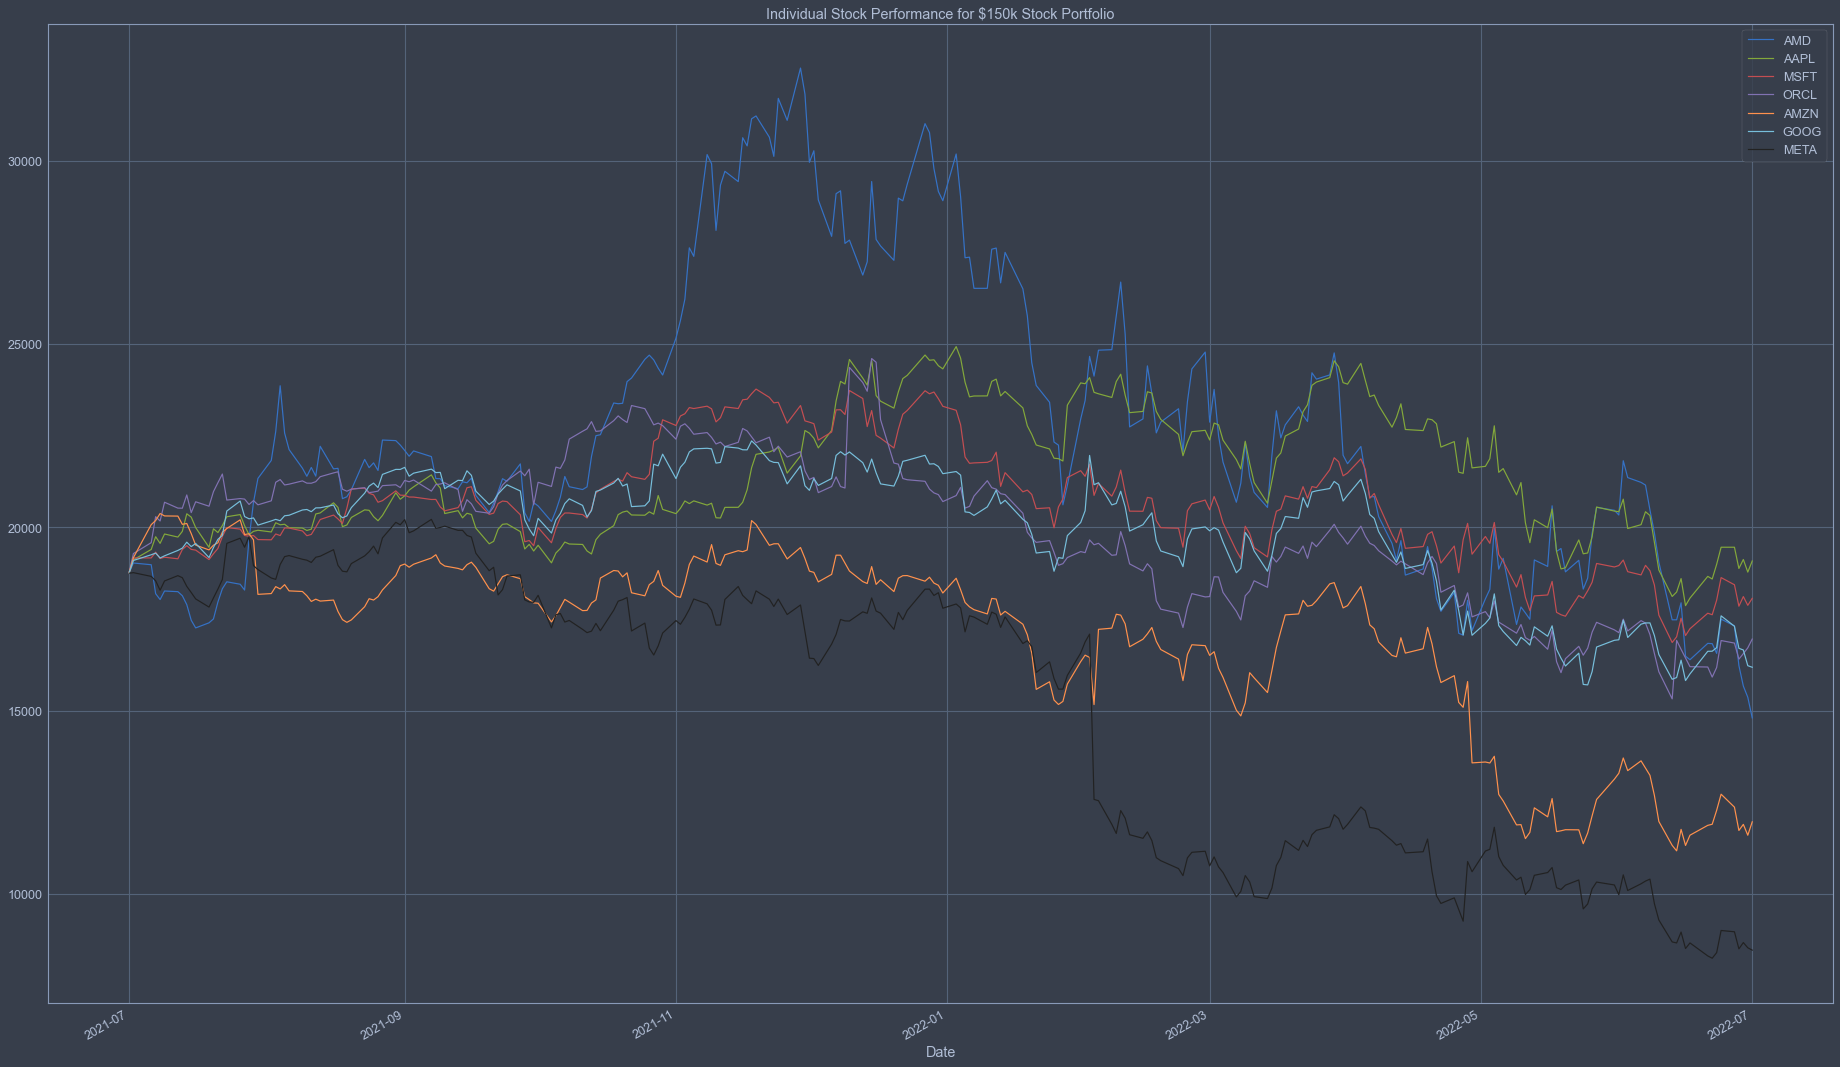

In [174]:
# Going to plot our total stock portfolio without TSLA since we can see that TSLA is an outlier compared to regular stock performance (when examining dates 2020-01-01 : 2022-06-30)
st_position_values_wo_TSLA = st_position_values.drop("TSLA", axis = 1)

st_position_values_wo_TSLA.drop("Total", axis = 1).plot(figsize=(32,20), title="Individual Stock Performance for $150k Stock Portfolio");

In [175]:
# Printing starting values for each stock and each crypto in both of our portfolios
print("Starting Capital Allocation for Stock Portfolio:\n", st_position_values.iloc[0])
print("\nStarting Capital Allocation for Crypto Portfolio:\n", cr_position_values.iloc[0])
print("\nStarting Capital Allocation for SPY Portfolio:\n", spy_position_values.iloc[0])

Starting Capital Allocation for Stock Portfolio:
 AMD      18750.00
AAPL     18750.00
MSFT     18750.00
ORCL     18750.00
TSLA     18750.00
AMZN     18750.00
GOOG     18750.00
META     18750.00
Total   150000.00
Name: 2021-07-01 00:00:00, dtype: float64

Starting Capital Allocation for Crypto Portfolio:
 BTC      18750.00
ETH      18750.00
ADA      18750.00
SOL      18750.00
MATIC    18750.00
MANA     18750.00
ENJ      18750.00
VET      18750.00
Total   150000.00
Name: 2021-07-01 00:00:00, dtype: float64

Starting Capital Allocation for SPY Portfolio:
 SPY     150000.00
Total   150000.00
Name: 2021-07-01 00:00:00, dtype: float64


In [176]:
# Showing our crypto position values dataframe as a tabular reference
cr_position_values

,BTC,ETH,ADA,SOL,MATIC,MANA,ENJ,VET,Total
Date,,,,,,,,,
2021-07-01,18750.00,18750.00,18750.00,18750.00,18750.00,18750.00,18750.00,18750.00,150000.00
2021-07-02,18931.47,19073.22,19575.27,19096.02,19206.92,18319.08,18353.32,19225.18,151780.48
2021-07-03,19362.36,19748.08,19749.89,19353.29,19468.44,18973.87,18782.16,19367.69,154805.78
2021-07-04,19708.20,20596.24,20470.74,19258.86,19977.10,19696.12,19147.63,19460.34,158315.23
2021-07-05,18847.12,19503.84,19722.69,18514.56,19172.09,18581.91,18082.03,18486.03,150910.27
...,...,...,...,...,...,...,...,...,...
2022-06-27,11580.75,10589.26,6819.77,21583.05,9271.51,32772.45,9355.87,5445.99,107418.64
2022-06-28,11326.72,10153.67,6593.49,19829.06,8895.15,30088.10,8679.02,5193.77,100758.98
2022-06-29,11228.08,9748.84,6535.06,19013.74,8618.87,29761.22,8519.03,5031.97,98456.81


In [178]:
# Setting portfolio highs and lows for each portfolio, in order to convert these dates from str to datetime format in later cells

st_HighDate = '2022-01-03'
cr_HighDate = '2021-11-25'
spy_HighDate = '2022-01-03'

# Since the market is currently crashing, we'll use our current day values as our low to measure the severity of the current inflation crash for each portfolio
all_LowDate = '2022-06-30'

In [179]:
# Obtaining index values of the highest and lowest values for each portfolio to use in next cell
print(st_position_values.iloc[st_position_values['Total'].argmax()], "\n\nIndex for higest stock portfolio value = i[{}]".format(st_position_values.index.get_loc(st_HighDate)),
    "\n\n",cr_position_values.iloc[cr_position_values['Total'].argmax()], "\n\nIndex for higest crypto portfolio value = i[{}]".format(cr_position_values.index.get_loc(cr_HighDate)),
    "\n\n",spy_position_values.iloc[spy_position_values['Total'].argmax()], "\n\nIndex for higest SPY portfolio value = i[{}]".format(spy_position_values.index.get_loc(spy_HighDate)),
    "\n\n",st_position_values.iloc[st_position_values['Total'].argmin()], "\n\nIndex for lowest stock portfolio value = i[{}]".format(st_position_values.index.get_loc(all_LowDate)),
    "\n\n",cr_position_values.iloc[cr_position_values['Total'].argmin()], "\n\nIndex for lowest crypto portfolio value = i[{}]".format(cr_position_values.index.get_loc(all_LowDate)),
    "\n\n",spy_position_values.iloc[spy_position_values['Total'].argmin()], "\n\nIndex for lowest SPY portfolio value = i[{}]".format(spy_position_values.index.get_loc(all_LowDate)),
    )

AMD      31228.57
AAPL     21994.78
MSFT     23775.48
ORCL     22310.65
TSLA     31448.96
AMZN     20080.48
GOOG     22249.29
META     18269.07
Total   191357.26
Name: 2021-11-19 00:00:00, dtype: float64 

Index for higest stock portfolio value = i[128] 

 BTC      31987.86
ETH      37921.66
ADA      23182.44
SOL     115771.75
MATIC    31101.95
MANA    185911.73
ENJ      76652.98
VET      27129.75
Total   529660.13
Name: 2021-11-25 00:00:00, dtype: float64 

Index for higest crypto portfolio value = i[147] 

 SPY     167596.63
Total   167596.63
Name: 2022-01-03 00:00:00, dtype: float64 

Index for higest SPY portfolio value = i[128] 

 AMD      16487.38
AAPL     17866.67
MSFT     17049.68
ORCL     16438.00
TSLA     17681.84
AMZN     11323.29
GOOG     15822.18
META      8511.28
Total   121180.31
Name: 2022-06-16 00:00:00, dtype: float64 

Index for lowest stock portfolio value = i[251] 

 BTC     10621.34
ETH      8814.65
ADA      6404.12
SOL     17854.10
MATIC    6033.15
MANA    26441.

In [181]:
# Importing datetime package to convert datatypes from str to datetime
import datetime as dt

# Converting our start and end dates for both stock and crypto charts to datetime
st_TrueStartDate = dt.datetime.strptime(st_StartDate,'%Y-%m-%d')
st_TrueEndDate = dt.datetime.strptime(st_EndDate,'%Y-%m-%d')

cr_TrueStartDate = dt.datetime.strptime(cr_StartDate,'%Y-%m-%d')
cr_TrueEndDate = dt.datetime.strptime(cr_EndDate,'%Y-%m-%d')

spy_TrueStartDate = dt.datetime.strptime(spy_StartDate,'%Y-%m-%d')
spy_TrueEndDate = dt.datetime.strptime(spy_EndDate,'%Y-%m-%d')

st_PortfolioHigh = dt.datetime.strptime(st_HighDate,'%Y-%m-%d')
cr_PortfolioHigh = dt.datetime.strptime(cr_HighDate,'%Y-%m-%d')
spy_PortfolioHigh = dt.datetime.strptime(spy_HighDate,'%Y-%m-%d')

all_PortfolioLow = dt.datetime.strptime(all_LowDate,'%Y-%m-%d')

In [183]:
# Recording index counts for position lows and highs (for future use in formulas)
i_st_PortfolioLow = st_position_values.index.get_loc(st_EndDate)
i_cr_PortfolioLow = cr_position_values.index.get_loc(cr_EndDate)
i_spy_PortfolioLow = spy_position_values.index.get_loc(spy_EndDate)

i_st_PortfolioHigh = st_position_values.index.get_loc(st_HighDate)
i_cr_PortfolioHigh = cr_position_values.index.get_loc(cr_HighDate)
i_spy_PortfolioHigh = spy_position_values.index.get_loc(spy_HighDate)

# Checking index values
print("Stock Portfolio Low Index = i[{}] (date = {})".format(i_st_PortfolioLow, st_EndDate),
     "\nStock Portfolio High Index = i[{}] (date = {})".format(i_st_PortfolioHigh, st_HighDate),
     "\n\nCrypto Portfolio Low Index = i[{}] (date = {})".format(i_cr_PortfolioLow, cr_EndDate),
     "\nCrypto Portfolio High Index = i[{}] (date = {})".format(i_cr_PortfolioHigh, cr_HighDate),
     "\n\nSPY Portfolio Low Index = i[{}] (date = {})".format(i_spy_PortfolioLow, spy_EndDate),
     "\nSPY Portfolio High Index = i[{}] (date = {})".format(i_spy_PortfolioHigh, spy_HighDate)
     )

Stock Portfolio Low Index = i[252] (date = 2022-07-01) 
Stock Portfolio High Index = i[128] (date = 2022-01-03) 

Crypto Portfolio Low Index = i[364] (date = 2022-06-30) 
Crypto Portfolio High Index = i[147] (date = 2021-11-25) 

SPY Portfolio Low Index = i[252] (date = 2022-07-01) 
SPY Portfolio High Index = i[128] (date = 2022-01-03)


In [184]:
# Measuring the net change of each of our portfolios (the differences between our intial capital and the point where each of our portfolios were at their highest values)

print(
# Stock portfolio high and low values
"---\n** STOCKS PERFORMANCE **\n---",
        "\nHighest Stock Portfolio Value = ${:,.2f} \nNet Change at High = {:+,.2f}% ({:+,.2f} USD) \nMarket Surge Period = {} to {} ({})".format(
            st_position_values['Total'].max(),
            ((st_position_values['Total'].max() / st_position_values['Total'].iloc[0])-1)*100,
            (st_position_values['Total'].max() - st_position_values['Total'].iloc[0]),
            st_StartDate, st_HighDate,
            (st_PortfolioHigh - st_TrueStartDate)
            ),

        "\n\nCurrent Stock Portfolio Value (During Inflation Crash) = ${:,.2f} \nNet Change Since High = {:+,.2%} ({:+,.2f} USD)".format(
            st_position_values['Total'].loc[st_EndDate],
            ((st_position_values['Total'].loc[st_EndDate] / st_position_values['Total'].max())-1),
            (st_position_values['Total'].loc[st_EndDate] - st_position_values['Total'].max())
            ),

        "\nMarket Crash Period = {} to {} ({})".format(
            st_HighDate, st_EndDate,
            (all_PortfolioLow - st_PortfolioHigh)
            ),
        "\n\nNet Change Since Start = {:+,.2%} ({:+,.2f} USD)".format(
            (st_position_values['Total'].iloc[i_st_PortfolioLow] / st_position_values['Total'].iloc[0])-1,
            (st_position_values['Total'].iloc[i_st_PortfolioLow] - st_position_values['Total'].iloc[0])
            ),
        "\nTotal Investment Period = {} to {} ({})".format(
            st_StartDate, st_EndDate,
            (st_TrueEndDate - st_TrueStartDate)
            ),


# Crypto portfolio high and low values
"\n---\n** CRYPTO PERFORMANCE **\n---",
        "\nHighest Crypto Portfolio Value = ${:,.2f} \nNet Change at High = {:+,.2f}% ({:+,.2f} USD) \nMarket Surge Period = {} to {} ({})".format(
            cr_position_values['Total'].max(),
            ((cr_position_values['Total'].max() / cr_position_values['Total'].iloc[0])-1)*100,
            (cr_position_values['Total'].max() - cr_position_values['Total'].iloc[0]),
            cr_StartDate, cr_HighDate,
            (cr_PortfolioHigh - cr_TrueStartDate)),

        "\n\nCurrent Crypto Portfolio Value (During Inflation Crash) = ${:,.2f} \nNet Change Since High = {:+,.2%} ({:+,.2f} USD) \nMarket Crash Period = {} to {} ({})".format(
            cr_position_values['Total'].loc[cr_EndDate],
            ((cr_position_values['Total'].loc[cr_EndDate] / cr_position_values['Total'].max())-1),
            (cr_position_values['Total'].loc[cr_EndDate]-cr_position_values['Total'].max()),
            cr_HighDate, cr_EndDate,
            (all_PortfolioLow - cr_PortfolioHigh)),

        "\n\nNet Change Since Start = {:+,.2%} ({:+,.2f} USD) \nTotal Investment Period = {} to {} ({})".format(
            (cr_position_values['Total'].iloc[i_cr_PortfolioLow] / cr_position_values['Total'].iloc[0])-1,
            (cr_position_values['Total'].iloc[i_cr_PortfolioLow] - cr_position_values['Total'].iloc[0]),
            cr_StartDate, cr_EndDate,
            (cr_TrueEndDate - cr_TrueStartDate)),

# SPY portfolio high and low values
"\n---\n** SPY PERFORMANCE **\n---",
        "\nHighest SPY Portfolio Value = ${:,.2f} \nNet Change at High = {:+,.2f}% ({:+,.2f} USD) \nMarket Surge Period = {} to {} ({})".format(
            spy_position_values['Total'].max(),
            ((spy_position_values['Total'].max() / spy_position_values['Total'].iloc[0])-1)*100,
            (spy_position_values['Total'].max() - spy_position_values['Total'].iloc[0]),
            spy_StartDate, spy_HighDate,
            (spy_PortfolioHigh - spy_TrueStartDate)),

        "\n\nCurrent SPY Portfolio Value (During Inflation Crash) = ${:,.2f} \nNet Change Since High = {:+,.2%} ({:+,.2f} USD) \nMarket Crash Period = {} to {} ({})".format(
            spy_position_values['Total'].loc[spy_EndDate],
            ((spy_position_values['Total'].loc[spy_EndDate] / spy_position_values['Total'].max())-1),
            (spy_position_values['Total'].loc[spy_EndDate]-spy_position_values['Total'].max()),
            spy_HighDate, spy_EndDate,
            (all_PortfolioLow - spy_PortfolioHigh)),

        "\n\nNet Change Since Start = {:+,.2%} ({:+,.2f} USD) \nTotal Investment Period = {} to {} ({})".format(
            (spy_position_values['Total'].iloc[i_spy_PortfolioLow] / spy_position_values['Total'].iloc[0])-1,
            (spy_position_values['Total'].iloc[i_spy_PortfolioLow] - spy_position_values['Total'].iloc[0]),
            spy_HighDate, spy_EndDate,
            (spy_TrueEndDate - spy_TrueStartDate))
    )

---
** STOCKS PERFORMANCE **
--- 
Highest Stock Portfolio Value = $191,357.26 
Net Change at High = +27.57% (+41,357.26 USD) 
Market Surge Period = 2021-07-01 to 2022-01-03 (186 days, 0:00:00) 

Current Stock Portfolio Value (During Inflation Crash) = $124,386.51 
Net Change Since High = -35.00% (-66,970.75 USD) 
Market Crash Period = 2022-01-03 to 2022-07-01 (178 days, 0:00:00) 

Net Change Since Start = -17.08% (-25,613.49 USD) 
Total Investment Period = 2021-07-01 to 2022-07-01 (365 days, 0:00:00) 
---
** CRYPTO PERFORMANCE **
--- 
Highest Crypto Portfolio Value = $529,660.13 
Net Change at High = +253.11% (+379,660.13 USD) 
Market Surge Period = 2021-07-01 to 2021-11-25 (147 days, 0:00:00) 

Current Crypto Portfolio Value (During Inflation Crash) = $97,283.56 
Net Change Since High = -81.63% (-432,376.56 USD) 
Market Crash Period = 2021-11-25 to 2022-06-30 (217 days, 0:00:00) 

Net Change Since Start = -35.14% (-52,716.44 USD) 
Total Investment Period = 2021-07-01 to 2022-06-30 (36

In [185]:
# Viewing our highest portfolio values per portfolio and observing the dates when these highs occurred
print(st_position_values.iloc[st_position_values['Total'].argmax()],
    "\n\n", cr_position_values.iloc[cr_position_values['Total'].argmax()],
    "\n\n", spy_position_values.iloc[spy_position_values['Total'].argmax()]
    )

AMD      31228.57
AAPL     21994.78
MSFT     23775.48
ORCL     22310.65
TSLA     31448.96
AMZN     20080.48
GOOG     22249.29
META     18269.07
Total   191357.26
Name: 2021-11-19 00:00:00, dtype: float64 

 BTC      31987.86
ETH      37921.66
ADA      23182.44
SOL     115771.75
MATIC    31101.95
MANA    185911.73
ENJ      76652.98
VET      27129.75
Total   529660.13
Name: 2021-11-25 00:00:00, dtype: float64 

 SPY     167596.63
Total   167596.63
Name: 2022-01-03 00:00:00, dtype: float64


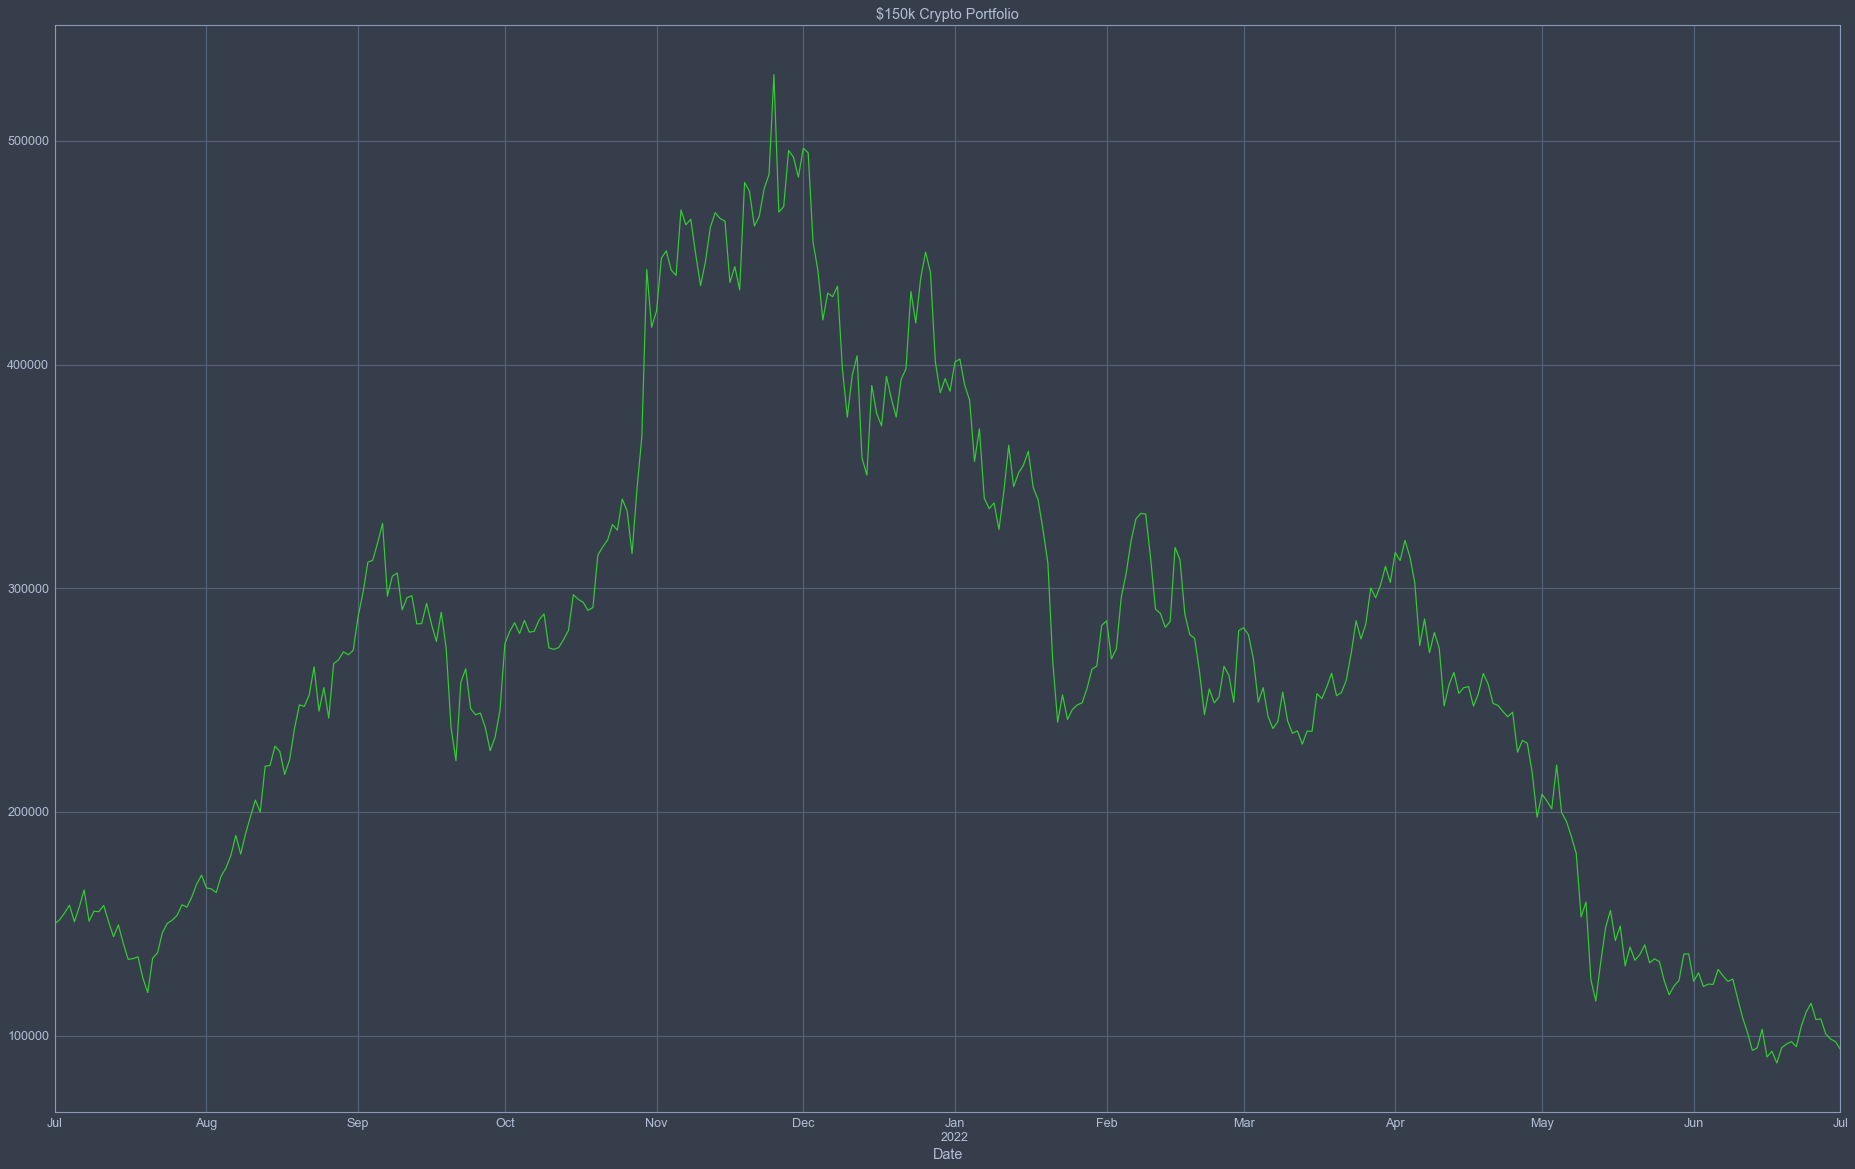

In [186]:
### Plotting our total crypto portfolio during covid crash (will filter with dates = 2020-01-01 : 2020-06-01)
cr_position_values['Total'].plot(figsize=(32,20), title='$150k Crypto Portfolio', c='limegreen');

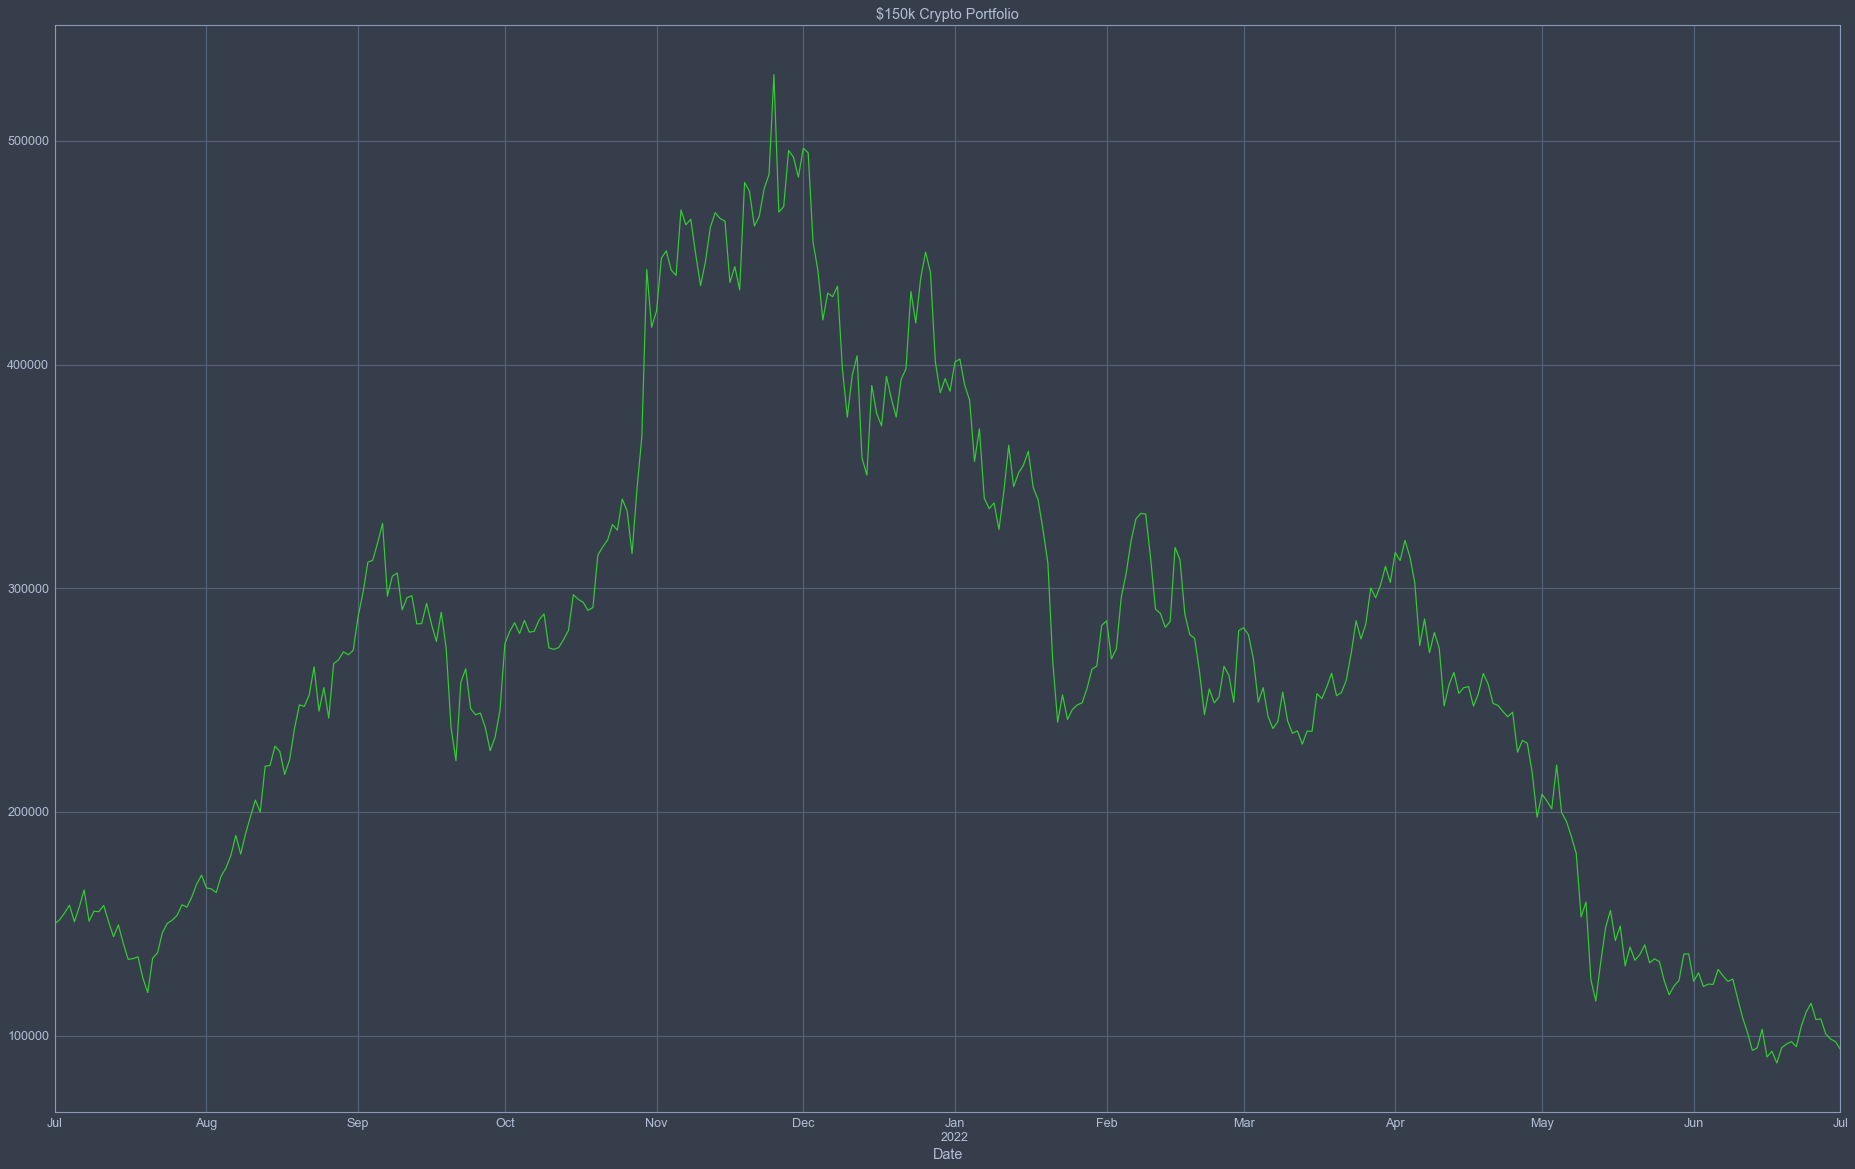

In [187]:
# Plotting our total crypto portfolio for total timeline
cr_position_values['Total'].plot(figsize=(32,20), title='$150k Crypto Portfolio',c='limegreen');

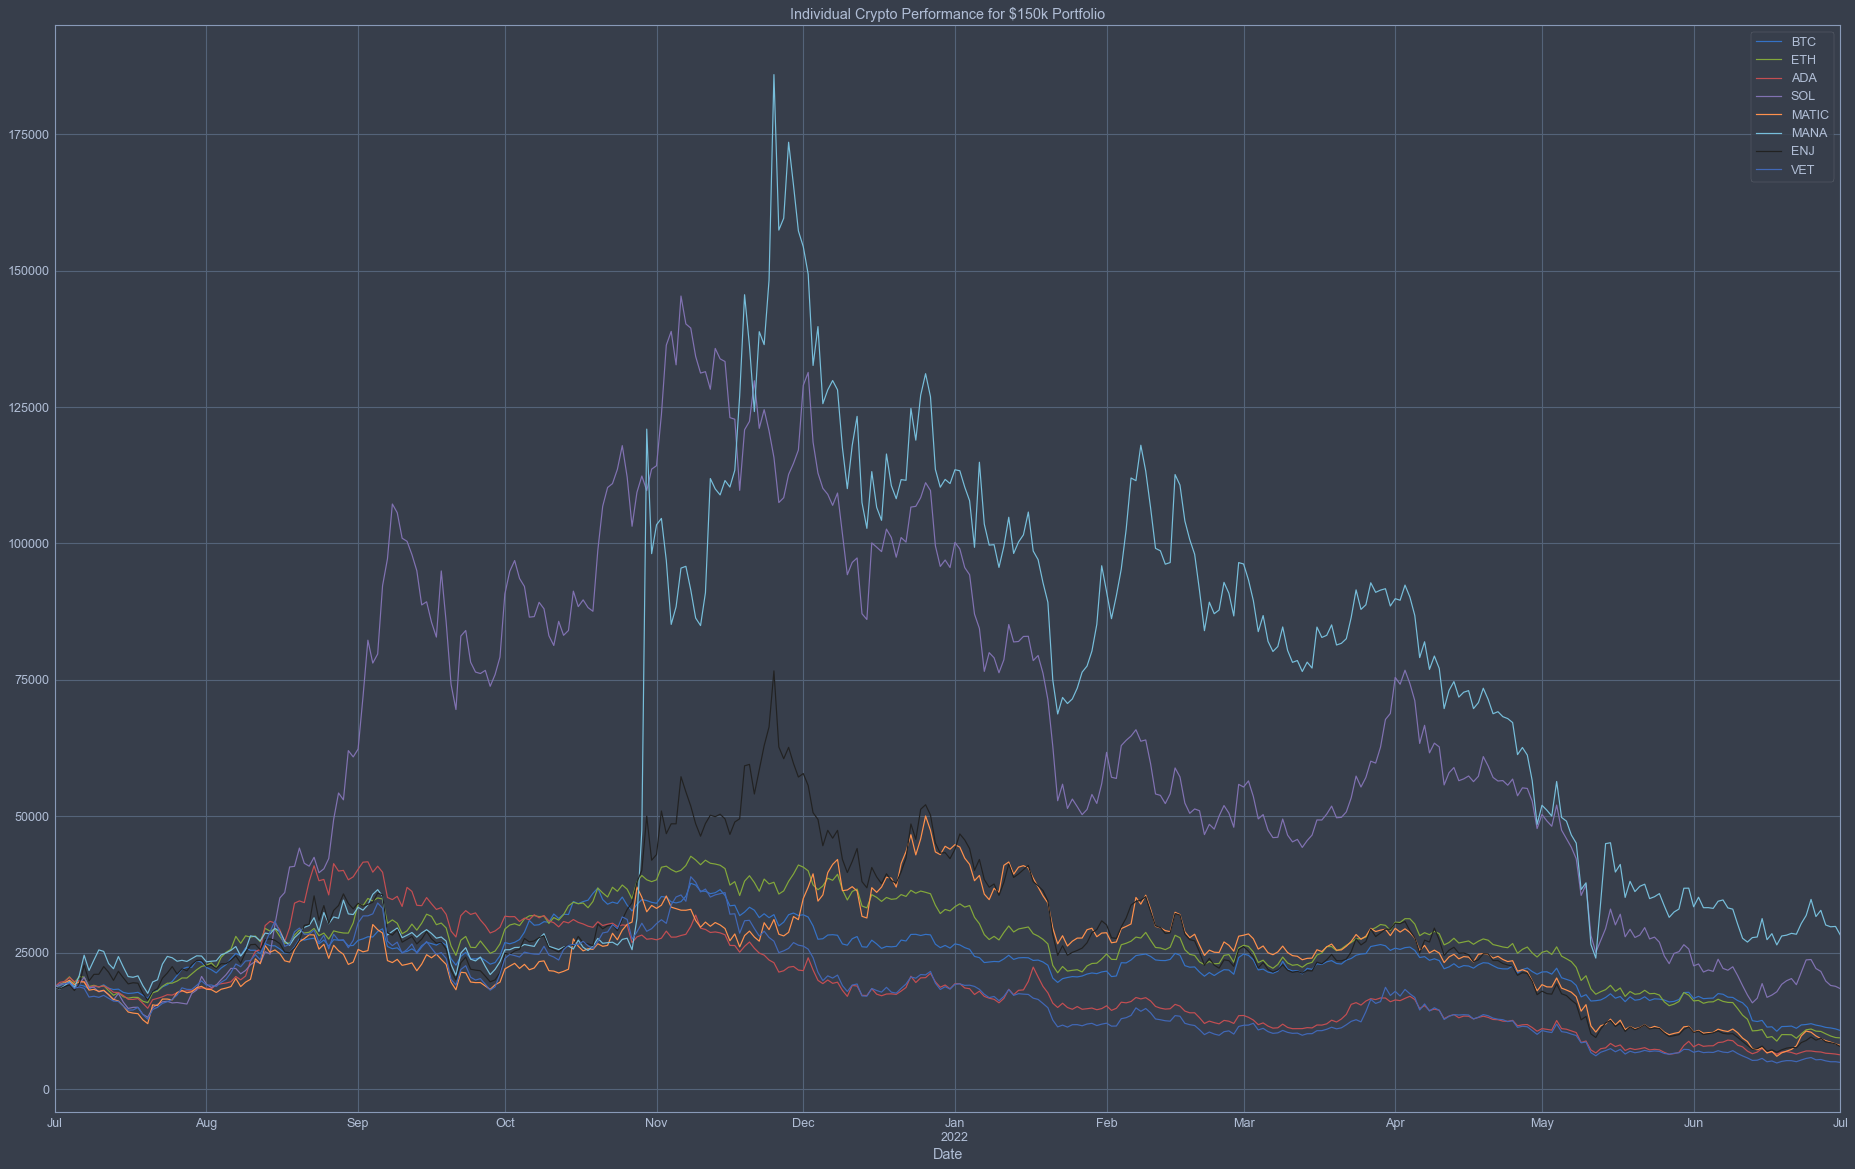

In [188]:
# Plotting each crypto within our total crypto portfolio
cr_position_values.drop('Total', axis = 1).plot(figsize=(32,20), title='Individual Crypto Performance for $150k Portfolio');

# **III) Calculating Returns & Sharpe Ratio**

In [189]:
# Testing IPython's display method with HTML and CSS formatting

from IPython.display import display, HTML

css = '''
.output {
    flex-direction: row;
}
'''

HTML('<style>{}</style>'.format(css))

# Examining final values for each portfolio one last time and confirming that final dates are aligned prior to calculating cumulative returns
display(st_position_values.tail(1),
        cr_position_values.tail(1),
        spy_position_values.tail(1))

,AMD,AAPL,MSFT,ORCL,TSLA,AMZN,GOOG,META,Total
Date,,,,,,,,,
2022-07-01,14803.48,19085.16,18066.52,16954.75,18857.04,11967.77,16184.96,8466.84,124386.51


,BTC,ETH,ADA,SOL,MATIC,MANA,ENJ,VET,Total
Date,,,,,,,,,
2022-07-01,10761.93,9401.30,6290.51,18412.67,8027.23,28220.90,7804.10,4907.19,93825.84


,SPY,Total
Date,,
2022-07-01,134746.81,134746.81


In [190]:
# Final check of individual values prior to calculating cumulative returns
print(
    '\nInitial st portfolio value = ${:,.2f}'.format(st_position_values['Total'][0]),
    '\nInitial cr portfolio value = ${:,.2f}'.format(cr_position_values['Total'][0]),
    '\nInitial spy portfolio value = ${:,.2f}'.format(spy_position_values['Total'][0]),

    '\n\nFinal st portfolio value = ${:,.2f}'.format(st_position_values['Total'][-1]),
    '\nFinal cr portfolio value = ${:,.2f}'.format(cr_position_values['Total'][-1]),
    '\nFinal spy portfolio value = ${:,.2f}'.format(spy_position_values['Total'][-1])
    )

# Final check passed, all values are correct


Initial st portfolio value = $150,000.00 
Initial cr portfolio value = $150,000.00 
Initial spy portfolio value = $150,000.00 

Final st portfolio value = $124,386.51 
Final cr portfolio value = $93,825.84 
Final spy portfolio value = $134,746.81


In [191]:
# Calculating our cumulative stock portfolio returns in percentage
st_cumulative_return = (st_position_values['Total'][-1] / st_position_values['Total'][0]-1) * 100

# Calculating our cumulative crypto portfolio returns in percentage
cr_cumulative_return = ((cr_position_values['Total'][-1] / cr_position_values['Total'][0])-1) * 100

# Calculating our cumulative SPY portfolio returns in percentage
spy_cumulative_return = ((spy_position_values['Total'][-1] / spy_position_values['Total'][0])-1) * 100

print(
'---\n** CUMULATIVE RETURNS PER PORTFOLIO **\n---',
        '\nStocks Cumulative Return: {:+.2f}%'.format(st_cumulative_return),
        '\nCrypto Cumulative Return: {:+.2f}%'.format(cr_cumulative_return),
        '\nSPY Cumulative Return: {:+.2f}%'.format(spy_cumulative_return),

'\n\n---\n** COMPARISON OF CUMULATIVE OUTPERFORMANCE **\n---',
    '\nCumulative Outperformance of Stocks vs Crypto: {:+.2f}%'.format(st_cumulative_return - cr_cumulative_return),
        '\n ** AKA we could have kept an extra {:+.2f}% of our initial capital if we invested in Stocks instead of Crypto **'.format(st_cumulative_return - cr_cumulative_return),

    '\nCumulative Outperformance of Stocks vs SPY: {:+.2f}%'.format(spy_cumulative_return - st_cumulative_return),
        '\n ** AKA we could have kept an extra {:+.2f}% of our initial capital if we invested in Stocks instead of SPY **'.format(spy_cumulative_return - st_cumulative_return),

    '\nCumulative Outperformance of Crypto vs SPY: {:+.2f}%'.format(spy_cumulative_return - cr_cumulative_return),
        '\n ** AKA we could have kept an extra {:+.2f}% of our initial capital if we invested in Crypto instead of SPY **'.format(spy_cumulative_return - cr_cumulative_return),

'\n\n---\n** COMPARISON OF RISK VS REWARD RATIOS **\n---',
#TODO
    '\nCumulative Risk of Stocks vs Crypto: {:+.2f}%'.format(st_cumulative_return - cr_cumulative_return),
        '\n ** AKA we could gain up to an extra {:+.2f}% of our initial capital if we invest in Stocks instead of Crypto **'.format(st_cumulative_return - cr_cumulative_return),
    '\nCumulative Reward of Stocks vs Crypto: {:+.2f}%'.format(st_cumulative_return - cr_cumulative_return),
        '\n ** AKA we could lose up to an extra {:+.2f}% of our initial capital if we invest in Stocks instead of Crypto **'.format(st_cumulative_return - cr_cumulative_return),

    '\n\nCumulative Risk of Stocks vs SPY: {:+.2f}%'.format(st_cumulative_return - cr_cumulative_return),
        '\n ** AKA we could gain up to an extra {:+.2f}% of our initial capital if we invest in Stocks instead of SPY **'.format(st_cumulative_return - cr_cumulative_return),
    '\nCumulative Reward of Stocks vs SPY: {:+.2f}%'.format(st_cumulative_return - cr_cumulative_return),
        '\n ** AKA we could lose up to an extra {:+.2f}% of our initial capital if we invest in Stocks instead of SPY **'.format(st_cumulative_return - cr_cumulative_return),

    '\n\nCumulative Risk of Crypto vs SPY: {:+.2f}%'.format(st_cumulative_return - cr_cumulative_return),
        '\n ** AKA we could gain up to an extra {:+.2f}% of our initial capital if we invest in Crypto instead of SPY **'.format(st_cumulative_return - cr_cumulative_return),
    '\nCumulative Reward of Crypto vs SPY: {:+.2f}%'.format(st_cumulative_return - cr_cumulative_return),
        '\n ** AKA we could lose up to an extra {:+.2f}% of our initial capital if we invest in Crypto instead of SPY **'.format(st_cumulative_return - cr_cumulative_return),
    )

---
** CUMULATIVE RETURNS PER PORTFOLIO **
--- 
Stocks Cumulative Return: -17.08% 
Crypto Cumulative Return: -37.45% 
SPY Cumulative Return: -10.17% 

---
** COMPARISON OF CUMULATIVE OUTPERFORMANCE **
--- 
Cumulative Outperformance of Stocks vs Crypto: +20.37% 
 ** AKA we could have kept an extra +20.37% of our initial capital if we invested in Stocks instead of Crypto ** 
Cumulative Outperformance of Stocks vs SPY: +6.91% 
 ** AKA we could have kept an extra +6.91% of our initial capital if we invested in Stocks instead of SPY ** 
Cumulative Outperformance of Crypto vs SPY: +27.28% 
 ** AKA we could have kept an extra +27.28% of our initial capital if we invested in Crypto instead of SPY ** 

---
** COMPARISON OF RISK VS REWARD RATIOS **
--- 
Cumulative Risk of Stocks vs Crypto: +20.37% 
 ** AKA we could gain up to an extra +20.37% of our initial capital if we invest in Stocks instead of Crypto ** 
Cumulative Reward of Stocks vs Crypto: +20.37% 
 ** AKA we could lose up to an extra +2

In [192]:
# Calculating daily returns for each stock
st_position_values['Daily Return'] = st_position_values['Total'].pct_change(1)
# Our '1' argument calculates the total value of the current day and the previous day

# Calculating daily returns for each crypto
cr_position_values['Daily Return'] = cr_position_values['Total'].pct_change(1)

# Calculating daily returns for SPY
spy_position_values['Daily Return'] = spy_position_values['Total'].pct_change(1)

# Viewing our first 10 daily return values for each portfolio to confirm that formulas are working correctly
display(
    st_position_values.head(10),
    cr_position_values.head(10),
    spy_position_values.head(10)
    )

,AMD,AAPL,MSFT,ORCL,TSLA,AMZN,GOOG,META,Total,Daily Return
Date,,,,,,,,,,
2021-07-01,18750.00,18750.00,18750.00,18750.00,18750.00,18750.00,18750.00,18750.00,150000.00,NaN
2021-07-02,19029.31,19117.43,19167.66,19287.47,18777.11,19176.07,19098.76,18766.40,152420.21,0.02
2021-07-06,18983.09,19398.82,19168.35,19584.49,18242.75,20075.95,19254.85,18664.82,153373.11,0.01
2021-07-07,18193.39,19747.12,19325.06,20294.03,17829.82,20189.77,19300.32,18543.66,153423.18,0.00
2021-07-08,18032.63,19565.45,19151.79,20176.17,18055.50,20380.00,19166.71,18287.58,152815.85,-0.00
2021-07-09,18265.73,19820.88,19187.68,20687.71,18170.01,20314.08,19225.69,18539.96,154211.73,0.01
2021-07-12,18247.64,19737.56,19144.88,20527.41,18965.18,20309.77,19372.51,18684.92,154989.87,0.01
2021-07-13,18137.12,19893.28,19397.55,20525.05,18490.57,20084.80,19436.38,18628.31,154593.06,-0.00
2021-07-14,17893.98,20372.71,19503.18,20887.05,18071.27,20108.39,19597.82,18392.34,154826.74,0.00


,BTC,ETH,ADA,SOL,MATIC,MANA,ENJ,VET,Total,Daily Return
Date,,,,,,,,,,
2021-07-01,18750.00,18750.00,18750.00,18750.00,18750.00,18750.00,18750.00,18750.00,150000.00,NaN
2021-07-02,18931.47,19073.22,19575.27,19096.02,19206.92,18319.08,18353.32,19225.18,151780.48,0.01
2021-07-03,19362.36,19748.08,19749.89,19353.29,19468.44,18973.87,18782.16,19367.69,154805.78,0.02
2021-07-04,19708.20,20596.24,20470.74,19258.86,19977.10,19696.12,19147.63,19460.34,158315.23,0.02
2021-07-05,18847.12,19503.84,19722.69,18514.56,19172.09,18581.91,18082.03,18486.03,150910.27,-0.05
2021-07-06,19120.33,20622.46,19907.36,19235.59,19697.26,20820.92,19291.74,18734.26,157429.93,0.04
2021-07-07,18908.17,20538.03,19697.70,20539.08,19638.53,24558.30,22735.09,18490.47,165105.37,0.05
2021-07-08,18361.98,18806.96,18673.28,18637.57,18157.98,21750.65,19861.07,16886.06,151135.54,-0.08
2021-07-09,18876.16,19043.52,18944.62,18671.76,18297.02,23665.59,21048.55,17034.55,155581.76,0.03


,SPY,Total,Daily Return
Date,,,
2021-07-01,150000.00,150000.00,NaN
2021-07-02,151146.53,151146.53,0.01
2021-07-06,150871.22,150871.22,-0.00
2021-07-07,151404.41,151404.41,0.00
2021-07-08,150170.77,150170.77,-0.01
2021-07-09,151773.81,151773.81,0.01
2021-07-12,152317.45,152317.45,0.00
2021-07-13,151798.21,151798.21,-0.00
2021-07-14,152024.72,152024.72,0.00


In [193]:
# Calculating our average daily return for each of our portfolios
st_position_values['Daily Return'].mean()
cr_position_values['Daily Return'].mean()
spy_position_values['Daily Return'].mean()
print('Average Daily Return for Stock Portfolio:{:.4f}%'.format(st_position_values['Daily Return'].mean()),
      '\nAverage Daily Return for Crypto Portfolio: {:.4f}%'.format(cr_position_values['Daily Return'].mean()),
      '\nAverage Daily Return for SPY Portfolio: {:.4f}%'.format(spy_position_values['Daily Return'].mean())
      )

Average Daily Return for Stock Portfolio:-0.0005% 
Average Daily Return for Crypto Portfolio: 0.0001% 
Average Daily Return for SPY Portfolio: -0.0003%


#### Keep in mind that these daily return values are not standard
##### This is simply how each portfolio is performing within our date range (2021-07-01 : 2022-07-01), which includes an ongoing market crash due to high inflation rates

In [194]:
# Calculating the standard deviation for our daily returns for each of our portfolios
st_position_values['Daily Return'].std()
cr_position_values['Daily Return'].std()
spy_position_values['Daily Return'].std()
print(
    'Standard Deviation of Daily Return for Stock Portfolio: {:.4f}%'.format(st_position_values['Daily Return'].std()),
    '\nStandard Deviation of Daily Return for Crypto Portfolio: {:.4f}%'.format(cr_position_values['Daily Return'].std()),
    '\nStandard Deviation of Daily Return for SPY Portfolio: {:.4f}%'.format(spy_position_values['Daily Return'].std())
    )

Standard Deviation of Daily Return for Stock Portfolio: 0.0208% 
Standard Deviation of Daily Return for Crypto Portfolio: 0.0517% 
Standard Deviation of Daily Return for SPY Portfolio: 0.0125%


In [195]:
# Calculating our Sharpe Ratio per portfolio with an assumed risk-free rate of 0
st_sharpe_ratio = st_position_values['Daily Return'].mean() / st_position_values['Daily Return'].std()
st_sharpe_ratio

cr_sharpe_ratio = cr_position_values['Daily Return'].mean() / cr_position_values['Daily Return'].std()
cr_sharpe_ratio

spy_sharpe_ratio = spy_position_values['Daily Return'].mean() / spy_position_values['Daily Return'].std()
spy_sharpe_ratio

print(
    'Sharpe Ratio for Stock Portfolio: {:.4f}%'.format(st_sharpe_ratio),
    '\nSharpe Ratio for Crypto Portfolio: {:.4f}%'.format(cr_sharpe_ratio),
    '\nSharpe Ratio for SPY Portfolio: {:.4f}%'.format(spy_sharpe_ratio)
    )

Sharpe Ratio for Stock Portfolio: -0.0254% 
Sharpe Ratio for Crypto Portfolio: 0.0011% 
Sharpe Ratio for SPY Portfolio: -0.0277%


In [196]:
# Index count check

print(st_position_values.shape[0], cr_position_values.shape[0], spy_position_values.shape[0])

display(
    st_position_values,
    cr_position_values,
    spy_position_values
    )

253 366 253


,AMD,AAPL,MSFT,ORCL,TSLA,AMZN,GOOG,META,Total,Daily Return
Date,,,,,,,,,,
2021-07-01,18750.00,18750.00,18750.00,18750.00,18750.00,18750.00,18750.00,18750.00,150000.00,NaN
2021-07-02,19029.31,19117.43,19167.66,19287.47,18777.11,19176.07,19098.76,18766.40,152420.21,0.02
2021-07-06,18983.09,19398.82,19168.35,19584.49,18242.75,20075.95,19254.85,18664.82,153373.11,0.01
2021-07-07,18193.39,19747.12,19325.06,20294.03,17829.82,20189.77,19300.32,18543.66,153423.18,0.00
2021-07-08,18032.63,19565.45,19151.79,20176.17,18055.50,20380.00,19166.71,18287.58,152815.85,-0.00
...,...,...,...,...,...,...,...,...,...,...
2022-06-27,17313.26,19460.19,18436.09,16844.70,20322.09,12367.57,17303.93,8967.35,131015.18,-0.01
2022-06-28,16232.18,18880.48,17850.77,16406.90,19305.10,11731.82,16702.86,8501.23,125611.33,-0.04
2022-06-29,15671.55,19126.37,18113.85,16557.61,18958.82,11897.86,16656.12,8673.71,125655.90,0.00


,BTC,ETH,ADA,SOL,MATIC,MANA,ENJ,VET,Total,Daily Return
Date,,,,,,,,,,
2021-07-01,18750.00,18750.00,18750.00,18750.00,18750.00,18750.00,18750.00,18750.00,150000.00,NaN
2021-07-02,18931.47,19073.22,19575.27,19096.02,19206.92,18319.08,18353.32,19225.18,151780.48,0.01
2021-07-03,19362.36,19748.08,19749.89,19353.29,19468.44,18973.87,18782.16,19367.69,154805.78,0.02
2021-07-04,19708.20,20596.24,20470.74,19258.86,19977.10,19696.12,19147.63,19460.34,158315.23,0.02
2021-07-05,18847.12,19503.84,19722.69,18514.56,19172.09,18581.91,18082.03,18486.03,150910.27,-0.05
...,...,...,...,...,...,...,...,...,...,...
2022-06-27,11580.75,10589.26,6819.77,21583.05,9271.51,32772.45,9355.87,5445.99,107418.64,0.00
2022-06-28,11326.72,10153.67,6593.49,19829.06,8895.15,30088.10,8679.02,5193.77,100758.98,-0.06
2022-06-29,11228.08,9748.84,6535.06,19013.74,8618.87,29761.22,8519.03,5031.97,98456.81,-0.02


,SPY,Total,Daily Return
Date,,,
2021-07-01,150000.00,150000.00,NaN
2021-07-02,151146.53,151146.53,0.01
2021-07-06,150871.22,150871.22,-0.00
2021-07-07,151404.41,151404.41,0.00
2021-07-08,150170.77,150170.77,-0.01
...,...,...,...
2022-06-27,137344.62,137344.62,-0.00
2022-06-28,134538.28,134538.28,-0.02
2022-06-29,134428.71,134428.71,-0.00


In [197]:
# Counting number of trading days (AKA index count) for each portfolio (needed to calculate annual Sharpe Ratios)

st_trading_days = st_position_values.shape[0]
cr_trading_days = cr_position_values.shape[0]
spy_trading_days = spy_position_values.shape[0]

print(
    'Trading Days (AKA Max Index Count) for Stock Portfolio = {}'.format(st_trading_days),
    '\nTrading Days (AKA Max Index Count) for Crypto Portfolio = {}'.format(cr_trading_days),
    '\nTrading Days (AKA Max Index Count) for SPY Portfolio = {}'.format(spy_trading_days)
    )

Trading Days (AKA Max Index Count) for Stock Portfolio = 253 
Trading Days (AKA Max Index Count) for Crypto Portfolio = 366 
Trading Days (AKA Max Index Count) for SPY Portfolio = 253


In [198]:
# Calculating our annual Sharpe Ratio by multiplying our daily Sharpe Ratio with the square root of our annual number of trading days (which varies per portfolio)
st_annual_sharpe_ratio = (st_trading_days**0.5) * st_sharpe_ratio
st_annual_sharpe_ratio

cr_annual_sharpe_ratio = (cr_trading_days**0.5) * cr_sharpe_ratio
cr_annual_sharpe_ratio

spy_annual_sharpe_ratio = (spy_trading_days**0.5) * spy_sharpe_ratio
spy_annual_sharpe_ratio

print(
    'Annual Sharpe Ratio for Stock Portfolio: {:.4f}%'.format(st_annual_sharpe_ratio),
    '\nAnnual Sharpe Ratio for Crypto Portfolio: {:.4f}%'.format(cr_annual_sharpe_ratio),
    '\nAnnual Sharpe Ratio for SPY Portfolio: {:.4f}%'.format(spy_annual_sharpe_ratio)
    )

Annual Sharpe Ratio for Stock Portfolio: -0.4038% 
Annual Sharpe Ratio for Crypto Portfolio: 0.0217% 
Annual Sharpe Ratio for SPY Portfolio: -0.4399%


# **IV) Setting up for Portfolio Optimization**

In [199]:
# Creating a new dataframe and concatenating the closing price of each stock
# Creating new dataframes and concatenating the closing prices of each individual stock / crypto / ETF
stocks = [
    AMD['Adj Close'],
    AAPL['Adj Close'],
    MSFT['Adj Close'],
    ORCL['Adj Close'],
    TSLA['Adj Close'],
    AMZN['Adj Close'],
    GOOG['Adj Close'],
    META['Adj Close']
    ]

stocks = pd.concat(stocks, axis = 1)

cryptos = [
    BTC['Adj Close'],
    ETH['Adj Close'],
    ADA['Adj Close'],
    SOL['Adj Close'],
    MATIC['Adj Close'],
    MANA['Adj Close'],
    ENJ['Adj Close'],
    VET['Adj Close']
    ]

cryptos = pd.concat(cryptos, axis = 1)

etfs = [
    SPY['Adj Close']
    ]

etfs = pd.concat(etfs, axis = 1)

In [200]:
# Naming all columns with their respective stock / crypto / etf names
stocks.columns = ['AMD','AAPL','MSFT','ORCL','TSLA','AMZN','GOOG','META']

cryptos.columns = ['BTC','ETH','ADA','SOL','MATIC','MANA','ENJ','VET']

etfs.columns = ['SPY']

display(
    stocks.head(),
    cryptos.head(),
    etfs.head()
    )

,AMD,AAPL,MSFT,ORCL,TSLA,AMZN,GOOG,META
Date,,,,,,,,
2021-07-01,93.31,136.49,269.40,78.37,677.92,171.65,2527.37,354.39
2021-07-02,94.70,139.16,275.40,80.62,678.90,175.55,2574.38,354.70
2021-07-06,94.47,141.21,275.41,81.86,659.58,183.79,2595.42,352.78
2021-07-07,90.54,143.75,277.66,84.83,644.65,184.83,2601.55,350.49
2021-07-08,89.74,142.43,275.17,84.34,652.81,186.57,2583.54,345.65


,BTC,ETH,ADA,SOL,MATIC,MANA,ENJ,VET
Date,,,,,,,,
2021-07-01,33572.12,2113.61,1.34,33.40,1.08,0.55,1.15,0.08
2021-07-02,33897.05,2150.04,1.39,34.02,1.10,0.54,1.12,0.09
2021-07-03,34668.55,2226.11,1.41,34.48,1.12,0.56,1.15,0.09
2021-07-04,35287.78,2321.72,1.46,34.31,1.15,0.58,1.17,0.09
2021-07-05,33746.00,2198.58,1.40,32.98,1.10,0.55,1.11,0.08


,SPY
Date,
2021-07-01,424.40
2021-07-02,427.64
2021-07-06,426.86
2021-07-07,428.37
2021-07-08,424.88


In [201]:
# Calculating the daily percentage returns for each of our stocks / cryptos / etfs
stock_return = stocks.pct_change(1)

crypto_return = cryptos.pct_change(1)

# SPY and etfs are being used interchangeably since SPY is the only item in the etfs list at this time
etf_return = etfs.pct_change(1)

display(
    stock_return.head(),
    crypto_return.head(),
    etf_return.head()
    )

,AMD,AAPL,MSFT,ORCL,TSLA,AMZN,GOOG,META
Date,,,,,,,,
2021-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-07-02,0.01,0.02,0.02,0.03,0.00,0.02,0.02,0.00
2021-07-06,-0.00,0.01,0.00,0.02,-0.03,0.05,0.01,-0.01
2021-07-07,-0.04,0.02,0.01,0.04,-0.02,0.01,0.00,-0.01
2021-07-08,-0.01,-0.01,-0.01,-0.01,0.01,0.01,-0.01,-0.01


,BTC,ETH,ADA,SOL,MATIC,MANA,ENJ,VET
Date,,,,,,,,
2021-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-07-02,0.01,0.02,0.04,0.02,0.02,-0.02,-0.02,0.03
2021-07-03,0.02,0.04,0.01,0.01,0.01,0.04,0.02,0.01
2021-07-04,0.02,0.04,0.04,-0.00,0.03,0.04,0.02,0.00
2021-07-05,-0.04,-0.05,-0.04,-0.04,-0.04,-0.06,-0.06,-0.05


,SPY
Date,
2021-07-01,NaN
2021-07-02,0.01
2021-07-06,-0.00
2021-07-07,0.00
2021-07-08,-0.01


# **V) Preparing Variables for Portfolio Optimization**

In [202]:
### Shape check
stocks.shape, cryptos.shape, etfs.shape

((253, 8), (366, 8), (253, 1))

In [203]:
# Setting up variables that we'll need to execute a for loop (which will calculate 10,000 different portfolio weighting combinations)
number_ports = 10000

st_all_weights = np.zeros((number_ports, len(stocks.columns)))

cr_all_weights = np.zeros((number_ports, len(cryptos.columns)))

spy_all_weights = np.zeros((number_ports, len(etfs.columns)))

display(
    st_all_weights.shape,
    cr_all_weights.shape,
    spy_all_weights.shape
    )

(10000, 8)

(10000, 8)

(10000, 1)

In [204]:
# Creating additional arrays for each of our portfolios to store key metrics from all of our scenarios

st_returns_array = np.zeros(number_ports)
st_volatility_array = np.zeros(number_ports)
st_sharpe_array = np.zeros(number_ports)

cr_returns_array = np.zeros(number_ports)
cr_volatility_array = np.zeros(number_ports)
cr_sharpe_array = np.zeros(number_ports)

spy_returns_array = np.zeros(number_ports)
spy_volatility_array = np.zeros(number_ports)
spy_sharpe_array = np.zeros(number_ports)

### Potential Title

In [205]:
# Planting randomization seeds for Python and Numpy (to provide result replication from our randomizer)
import random
random.seed(3)
np.random.seed(3)

In [206]:
# Testing weight seed randomness (checking if duplicated lines will run three unique random instances)
display(
    np.array(np.random.random(len(stocks.columns))) / np.sum(np.array(np.random.random(8))),
    np.array(np.random.random(len(cryptos.columns))) / np.sum(np.array(np.random.random(8))),
    np.array(np.random.random(len(etfs.columns))) / np.sum(np.array(np.random.random(8)))
    )

# Test passed

array([0.17354877, 0.22312755, 0.09166004, 0.16095469, 0.28135519,
       0.28240951, 0.03957019, 0.06529935])

array([0.00496929, 0.11580022, 0.05371973, 0.08601317, 0.05874927,
       0.14362519, 0.09126647, 0.03250458])

array([0.25646126])

In [207]:
### Test cell for running for loop for all portfolios simultaneously

for index in range(number_ports):
    
    # Generating random weights
    st_numbers = np.array(np.random.random(len(stocks.columns)))
    st_weights = st_numbers / np.sum(st_numbers)

    cr_numbers = np.array(np.random.random(len(cryptos.columns)))
    cr_weights = cr_numbers / np.sum(cr_numbers)

    spy_numbers = np.array(np.random.random(len(etfs.columns)))
    spy_weights = spy_numbers / np.sum(spy_numbers)
    
    # Saving our weights
    st_all_weights[index, :] = st_weights
    cr_all_weights[index, :] = cr_weights
    spy_all_weights[index, :] = spy_weights
    
    # Calculating our annual expected return for our Portfolio List
    # Adding the product of (our daily returns for all stocks * the annual trading days * randomly allocated weights)
    st_returns_array[index] = np.sum(stock_return.mean() * st_trading_days * st_weights)
    cr_returns_array[index] = np.sum(crypto_return.mean() * cr_trading_days * cr_weights)
    spy_returns_array[index] = np.sum(etf_return.mean() * spy_trading_days * spy_weights)
    
    # Calculating volatility
    # Taking the sqrt of the transposed weights of each stock * covariance matrix * weights
    # .cov is being used to measure the variation between two stocks (>0 = positive relationship, <0 = inverse relationship)
    st_volatility_array[index] = np.sqrt(np.dot(st_weights.T,np.dot(stock_return.cov() * st_trading_days, st_weights)))
    cr_volatility_array[index] = np.sqrt(np.dot(cr_weights.T,np.dot(crypto_return.cov() * cr_trading_days, cr_weights)))
    spy_volatility_array[index] = np.sqrt(np.dot(spy_weights.T,np.dot(etf_return.cov() * spy_trading_days, spy_weights)))
    
    # Calculating our Sharpe Ratio
    st_sharpe_array[index] = st_returns_array[index] / st_volatility_array[index]
    cr_sharpe_array[index] = cr_returns_array[index] / cr_volatility_array[index]
    spy_sharpe_array[index] = spy_returns_array[index] / spy_volatility_array[index]

In [208]:
# Printing our stock portfolio's weight combinations and our first weight combination
print(
'\n---\n** STOCK WEIGHTS & COMBINATION **\n---'
    '\nAll Stock Weights:', st_all_weights,
    '\n\nFirst Combination:', st_all_weights[0],

    # Taking output of st_all_weights[0] to check that the weight distributions of our first combination are equal to 1.00 (100%)
    '\n\nTotal Weight Distribution of First Stock Combination =',(st_all_weights[0].sum()),'({:.4f}%)'.format(((st_all_weights[0].sum()))*100),

    '\n\nRows and Columns in Stock All Weights:',st_all_weights.shape,
    '\nRows = {}, which represents the number of scenarios tested'.format(st_all_weights.shape[0]),
    '\nColumns = {}, which represents the number of stocks in our portfolio per scenario tested'.format(st_all_weights.shape[1])
    )

# Printing our crypto portfolio's weight combinations and our first weight combination
print(
'\n---\n** CRYPTO WEIGHTS & COMBINATION **\n---'
    '\nAll Crypto Weights:', cr_all_weights,
    '\n\nFirst Combination:', cr_all_weights[0],

    # Taking output of cr_all_weights[0] to check that the weight distributions of our first combination are equal to 1.00 (100%)
    '\n\nTotal Weight Distribution of First Crypto Combination =',(cr_all_weights[0].sum()),'({:.4f}%)'.format(((cr_all_weights[0].sum()))*100),

    '\n\nRows and Columns in Crypto All Weights:',cr_all_weights.shape,
    '\nRows = {}, which represents the number of scenarios tested'.format(cr_all_weights.shape[0]),
    '\nColumns = {}, which represents the number of cryptos in our portfolio per scenario tested'.format(cr_all_weights.shape[1])
    )


# Printing our etf portfolio's weight combinations and our first weight combination
print(
'\n---\n** SPY WEIGHTS & COMBINATION **\n---'
    '\nAll SPY Weights:', spy_all_weights,
    '\n\nFirst Combination:', spy_all_weights[0],
    # In this case our weight distribution will always be 1 since there is only one possible etf to distribute to (with one etf, it can only recieve 100% of the distribution)

    # Taking output of spy_all_weights[0] to check that the weight distributions of our first combination are equal to 1.00 (100%)
    '\n\nTotal Weight Distribution of First SPY Combination =',(spy_all_weights[0].sum()),'({:.4f}%)'.format(((spy_all_weights[0].sum()))*100),

    '\n\nRows and Columns in SPY All Weights:',spy_all_weights.shape,
    '\nRows = {}, which represents the number of scenarios tested'.format(spy_all_weights.shape[0]),
    '\nColumns = {}, which represents the number of etfs in our portfolio per scenario tested'.format(spy_all_weights.shape[1])
    )


---
** STOCK WEIGHTS & COMBINATION **
---
All Stock Weights: [[0.13413979 0.07701451 0.08346697 ... 0.16769693 0.08109136 0.07951513]
 [0.16832921 0.16786338 0.09099763 ... 0.13951516 0.07935671 0.10842379]
 [0.04584249 0.04967086 0.13620478 ... 0.08850535 0.37873443 0.12856462]
 ...
 [0.17233337 0.17945386 0.13166929 ... 0.02537579 0.11373388 0.07985291]
 [0.22420759 0.02537585 0.10438784 ... 0.11373727 0.22881418 0.04448196]
 [0.05607334 0.10724157 0.04837911 ... 0.11070002 0.19495605 0.1560412 ]] 

First Combination: [0.13413979 0.07701451 0.08346697 0.13092064 0.24615468 0.16769693
 0.08109136 0.07951513] 

Total Weight Distribution of First Stock Combination = 1.0 (100.0000%) 

Rows and Columns in Stock All Weights: (10000, 8) 
Rows = 10000, which represents the number of scenarios tested 
Columns = 8, which represents the number of stocks in our portfolio per scenario tested

---
** CRYPTO WEIGHTS & COMBINATION **
---
All Crypto Weights: [[0.15073057 0.06810408 0.06676739 ... 0.

In [209]:
# Printing all Sharpe Ratios and our first Sharpe Ratio
print(
    "All Stock Sharpe Ratios:", st_sharpe_array,
    "\nAll Crypto Sharpe Ratios:", cr_sharpe_array,
    "\nAll ETF Sharpe Ratios:", spy_sharpe_array
    )

print(
    "\nSharpe Ratio of First Stock Portfolio:", st_sharpe_array[0],
    "\nSharpe Ratio of First Crypto Portfolio:", cr_sharpe_array[0],
    "\nSharpe Ratio of First ETF Portfolio:", spy_sharpe_array[0]
    )

All Stock Sharpe Ratios: [-0.23749135 -0.38060523 -0.48304541 ... -0.17852738 -0.33635759
 -0.37625514] 
All Crypto Sharpe Ratios: [ 0.16778345  0.0960711   0.17954677 ...  0.14998216  0.55801795
 -0.02168273] 
All ETF Sharpe Ratios: [-0.4399336 -0.4399336 -0.4399336 ... -0.4399336 -0.4399336 -0.4399336]

Sharpe Ratio of First Stock Portfolio: -0.23749135023198767 
Sharpe Ratio of First Crypto Portfolio: 0.1677834517363727 
Sharpe Ratio of First ETF Portfolio: -0.4399335962805184


In [210]:
# Finding our highest Sharpe Ratio out of our 10,000 portfolio weighting combinations then finding the respective index
st_sharpe_array.max()
st_max_sharpe_index = st_sharpe_array.argmax()

cr_sharpe_array.max()
cr_max_sharpe_index = cr_sharpe_array.argmax()

spy_sharpe_array.max()
spy_max_sharpe_index = spy_sharpe_array.argmax()

# Finding our highest potential returns and volatility in order to measure effectiveness of our optimal Sharpe Ratio
st_returns_array.max()
st_max_returns_index = st_returns_array.argmax()

st_volatility_array.max()
st_max_volatility_index = st_volatility_array.argmax()

cr_returns_array.max()
cr_max_returns_index = cr_returns_array.argmax()

cr_volatility_array.max()
cr_max_volatility_index = cr_volatility_array.argmax()

spy_returns_array.max()
spy_max_returns_index = spy_returns_array.argmax()

spy_volatility_array.max()
spy_max_volatility_index = spy_volatility_array.argmax()

print(
    'Max Stock Sharpe Array = {:.4f} \n     Index = i[{}]'.format(st_sharpe_array.max(), st_max_sharpe_index),
    '\nMax Stock Returns Array = {:.4f} \n     Index = i[{}]'.format(st_returns_array.max(), st_max_returns_index),
    '\nMax Stock Volatility Array = {:.4f} \n     Index = i[{}]'.format(st_volatility_array.max(), st_max_volatility_index),

    '\n\nMax Crypto Sharpe Array = {:.4f} \n      Index = i[{}]'.format(cr_sharpe_array.max(), cr_max_sharpe_index),
    '\nMax Crypto Returns Array = {:.4f} \n     Index = i[{}]'.format(cr_returns_array.max(), cr_max_returns_index),
    '\nMax Crypto Volatility Array = {:.4f} \n     Index = i[{}]'.format(cr_volatility_array.max(), cr_max_volatility_index),

    '\n\nMax SPY Sharpe Array = {:.4f} \n     Index = i[{}]'.format(spy_sharpe_array.max(), spy_max_sharpe_index),
    '\nMax SPY Returns Array = {:.4f} \n     Index = i[{}]'.format(spy_returns_array.max(), spy_max_returns_index),
    '\nMax SPY Volatility Array = {:.4f} \n     Index = i[{}]'.format(spy_volatility_array.max(), spy_max_volatility_index)
    )

Max Stock Sharpe Array = 0.1595 
     Index = i[2851] 
Max Stock Returns Array = 0.0626 
     Index = i[2851] 
Max Stock Volatility Array = 0.4226 
     Index = i[4495] 

Max Crypto Sharpe Array = 0.7025 
      Index = i[7331] 
Max Crypto Returns Array = 0.8359 
     Index = i[7331] 
Max Crypto Volatility Array = 1.2877 
     Index = i[7772] 

Max SPY Sharpe Array = -0.4399 
     Index = i[0] 
Max SPY Returns Array = -0.0877 
     Index = i[0] 
Max SPY Volatility Array = 0.1995 
     Index = i[0]


In [211]:
### Quick index test (will use to filter date ranges)
st_position_values.index[0:4]

DatetimeIndex(['2021-07-01', '2021-07-02', '2021-07-06', '2021-07-07'], dtype='datetime64[ns]', name='Date', freq=None)

In [212]:
# Printing weights of our portfolio with the highest Sharpe Ratio to examine ideal allocation amounts
print(
    'Optimal Distributions per Stock (in order) = \n    {}'.format(st_all_weights[st_max_sharpe_index, :]),
    '\nOrder of Stocks = {}'.format(stocks.columns),
    '\n\nOptimal Distributions per Crypto (in order) = \n   {}'.format(cr_all_weights[cr_max_sharpe_index, :]),
    '\nOrder of Cryptos = {}'.format(cryptos.columns),
    '\n\nOptimal Distributions per ETF (in order) = \n  {}'.format(spy_all_weights[spy_max_sharpe_index, :]),
    '\nOrder of ETFs = {}'.format(etfs.columns)
    )

# Creating zip for loop to pair each optimal distribution with each stock
for stock, ideal_allo in zip(StockPortfolioList, st_all_weights[st_max_sharpe_index, :]):
    stock['Optimal Allocation'] = stock['Normalizing Return'] * ideal_allo

for stock, ideal_allo in zip(StockPortfolioList, st_all_weights[st_max_sharpe_index, :]):
    stock['Optimal Position Value'] = stock['Optimal Allocation'] * 150000

# Creating zip for loop to pair each optimal distribution with each stock
for crypto, ideal_allo in zip(CryptoPortfolioList, cr_all_weights[cr_max_sharpe_index, :]):
    crypto['Optimal Allocation'] = crypto['Normalizing Return'] * ideal_allo

for crypto, ideal_allo in zip(CryptoPortfolioList, cr_all_weights[cr_max_sharpe_index, :]):
    crypto['Optimal Position Value'] = crypto['Optimal Allocation'] * 150000

# Creating zip for loop to pair each optimal distribution with each stock
for etf, ideal_allo in zip(SpyPortfolioList, spy_all_weights[spy_max_sharpe_index, :]):
    etf['Optimal Allocation'] = etf['Normalizing Return'] * ideal_allo

for etf, ideal_allo in zip(SpyPortfolioList, spy_all_weights[spy_max_sharpe_index, :]):
    etf['Optimal Position Value'] = etf['Optimal Allocation'] * 150000

Optimal Distributions per Stock (in order) = 
    [0.10446315 0.19769478 0.1949047  0.05077489 0.41006944 0.00632873
 0.00959034 0.02617398] 
Order of Stocks = Index(['AMD', 'AAPL', 'MSFT', 'ORCL', 'TSLA', 'AMZN', 'GOOG', 'META'], dtype='object') 

Optimal Distributions per Crypto (in order) = 
   [0.02461726 0.01339007 0.10885385 0.28031187 0.17854902 0.36052709
 0.00825977 0.02549108] 
Order of Cryptos = Index(['BTC', 'ETH', 'ADA', 'SOL', 'MATIC', 'MANA', 'ENJ', 'VET'], dtype='object') 

Optimal Distributions per ETF (in order) = 
  [1.] 
Order of ETFs = Index(['SPY'], dtype='object')


In [213]:
# Examining outputs of zip for loops
display(
    StockPortfolioList[4],
    CryptoPortfolioList[4],
    SpyPortfolioList[0]
    )

,High,Low,Open,Close,Volume,Adj Close,Normalizing Return,Allocation,Position Value,Optimal Allocation,Optimal Position Value
Date,,,,,,,,,,,
2021-07-01,687.99,672.80,683.92,677.92,18634500,677.92,1.00,0.12,18750.00,0.41,61510.42
2021-07-02,700.00,673.26,678.98,678.90,27054500,678.90,1.00,0.13,18777.11,0.41,61599.34
2021-07-06,684.00,651.40,681.71,659.58,23284500,659.58,0.97,0.12,18242.75,0.40,59846.36
2021-07-07,665.70,638.32,664.27,644.65,18792000,644.65,0.95,0.12,17829.82,0.39,58491.70
2021-07-08,654.43,620.46,628.37,652.81,22773300,652.81,0.96,0.12,18055.50,0.39,59232.09
...,...,...,...,...,...,...,...,...,...,...,...
2022-06-27,756.21,727.70,748.10,734.76,29726100,734.76,1.08,0.14,20322.09,0.44,66667.74
2022-06-28,749.91,697.03,733.45,697.99,30130400,697.99,1.03,0.13,19305.10,0.42,63331.45
2022-06-29,693.52,666.82,691.50,685.47,27632400,685.47,1.01,0.13,18958.82,0.41,62195.46


,High,Low,Open,Close,Volume,Adj Close,Normalizing Return,Allocation,Position Value,Optimal Allocation,Optimal Position Value
Date,,,,,,,,,,,
2021-07-01,1.17,1.06,1.17,1.08,596223500,1.08,1.00,0.12,18750.00,0.18,26782.35
2021-07-02,1.11,1.04,1.07,1.10,483658487,1.10,1.02,0.13,19206.92,0.18,27435.01
2021-07-03,1.15,1.08,1.10,1.12,423834017,1.12,1.04,0.13,19468.44,0.19,27808.57
2021-07-04,1.18,1.10,1.12,1.15,510476356,1.15,1.07,0.13,19977.10,0.19,28535.13
2021-07-05,1.15,1.08,1.15,1.10,486095587,1.10,1.02,0.13,19172.09,0.18,27385.26
...,...,...,...,...,...,...,...,...,...,...,...
2022-06-27,0.59,0.52,0.56,0.53,549370870,0.53,0.49,0.06,9271.51,0.09,13243.35
2022-06-28,0.57,0.51,0.53,0.51,637527134,0.51,0.47,0.06,8895.15,0.08,12705.77
2022-06-29,0.54,0.49,0.51,0.50,891744786,0.50,0.46,0.06,8618.87,0.08,12311.13


,High,Low,Open,Close,Volume,Adj Close,Normalizing Return,Allocation,Position Value,Optimal Allocation,Optimal Position Value
Date,,,,,,,,,,,
2021-07-01,430.60,428.80,428.87,430.43,53441000.00,424.40,1.00,1.00,150000.00,1.00,150000.00
2021-07-02,434.10,430.52,431.67,433.72,57697700.00,427.64,1.01,1.01,151146.53,1.01,151146.53
2021-07-06,434.01,430.01,433.78,432.93,68710400.00,426.86,1.01,1.01,150871.22,1.01,150871.22
2021-07-07,434.76,431.51,433.66,434.46,63549500.00,428.37,1.01,1.01,151404.41,1.01,151404.41
2021-07-08,431.73,427.52,428.78,430.92,97595200.00,424.88,1.00,1.00,150170.77,1.00,150170.77
...,...,...,...,...,...,...,...,...,...,...,...
2022-06-27,391.36,387.44,391.05,388.59,66009600.00,388.59,0.92,0.92,137344.62,0.92,137344.62
2022-06-28,393.16,380.53,390.23,380.65,86548900.00,380.65,0.90,0.90,134538.28,0.90,134538.28
2022-06-29,382.27,378.42,381.23,380.34,65676000.00,380.34,0.90,0.90,134428.71,0.90,134428.71


In [214]:
### Creating portfolios with optimal allocation to plot against initial allocation (for performance comparison)
StockPortfolioList[4]

,High,Low,Open,Close,Volume,Adj Close,Normalizing Return,Allocation,Position Value,Optimal Allocation,Optimal Position Value
Date,,,,,,,,,,,
2021-07-01,687.99,672.80,683.92,677.92,18634500,677.92,1.00,0.12,18750.00,0.41,61510.42
2021-07-02,700.00,673.26,678.98,678.90,27054500,678.90,1.00,0.13,18777.11,0.41,61599.34
2021-07-06,684.00,651.40,681.71,659.58,23284500,659.58,0.97,0.12,18242.75,0.40,59846.36
2021-07-07,665.70,638.32,664.27,644.65,18792000,644.65,0.95,0.12,17829.82,0.39,58491.70
2021-07-08,654.43,620.46,628.37,652.81,22773300,652.81,0.96,0.12,18055.50,0.39,59232.09
...,...,...,...,...,...,...,...,...,...,...,...
2022-06-27,756.21,727.70,748.10,734.76,29726100,734.76,1.08,0.14,20322.09,0.44,66667.74
2022-06-28,749.91,697.03,733.45,697.99,30130400,697.99,1.03,0.13,19305.10,0.42,63331.45
2022-06-29,693.52,666.82,691.50,685.47,27632400,685.47,1.01,0.13,18958.82,0.41,62195.46


# **VI) Plotting All Portfolio Weighting Combinations**

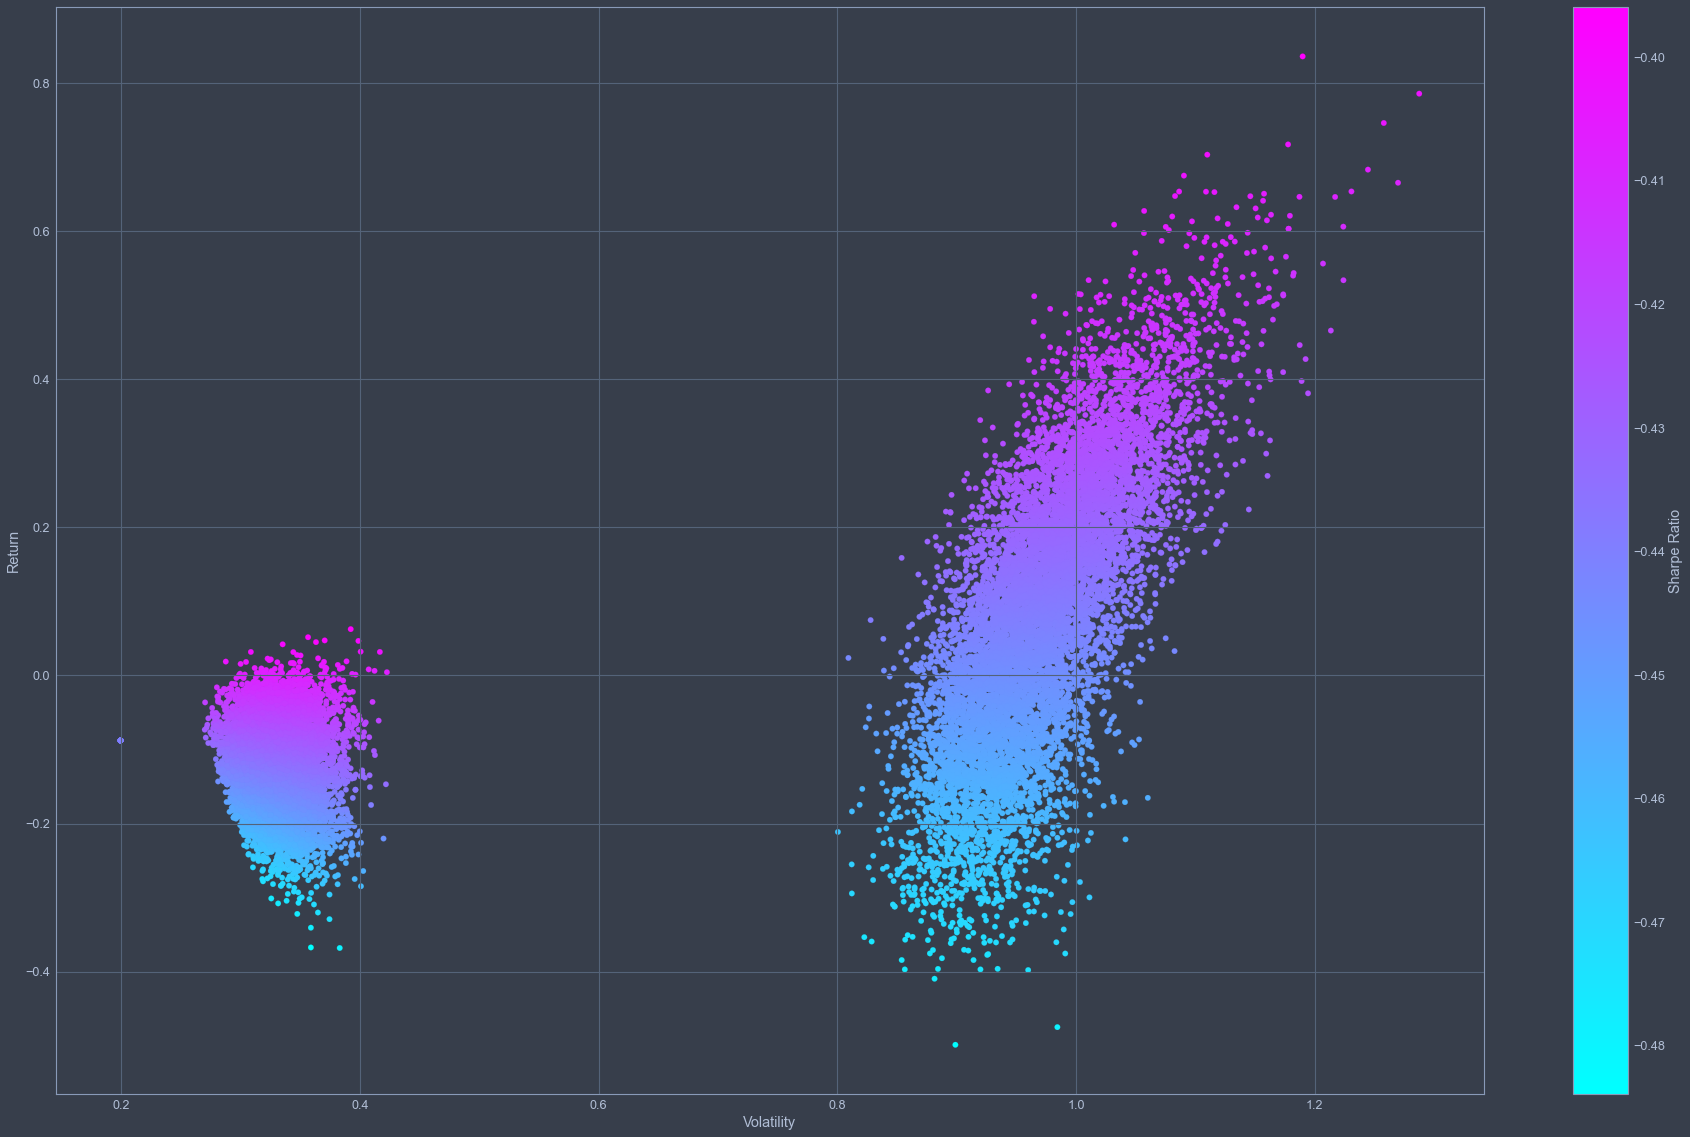

In [218]:
# Plotting all 10,000 portfolio weighting combinations with a heatmap
plt.figure(figsize=(32,20))

# Using a scatter plot to show our Sharpe Ratio values in terms of return and volatility
plt.scatter(st_volatility_array, st_returns_array, c=st_sharpe_array, cmap= 'cool')
plt.scatter(cr_volatility_array, cr_returns_array, c=cr_sharpe_array, cmap = 'cool')
plt.scatter(spy_volatility_array, spy_returns_array, c=spy_sharpe_array, cmap = 'cool')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return');

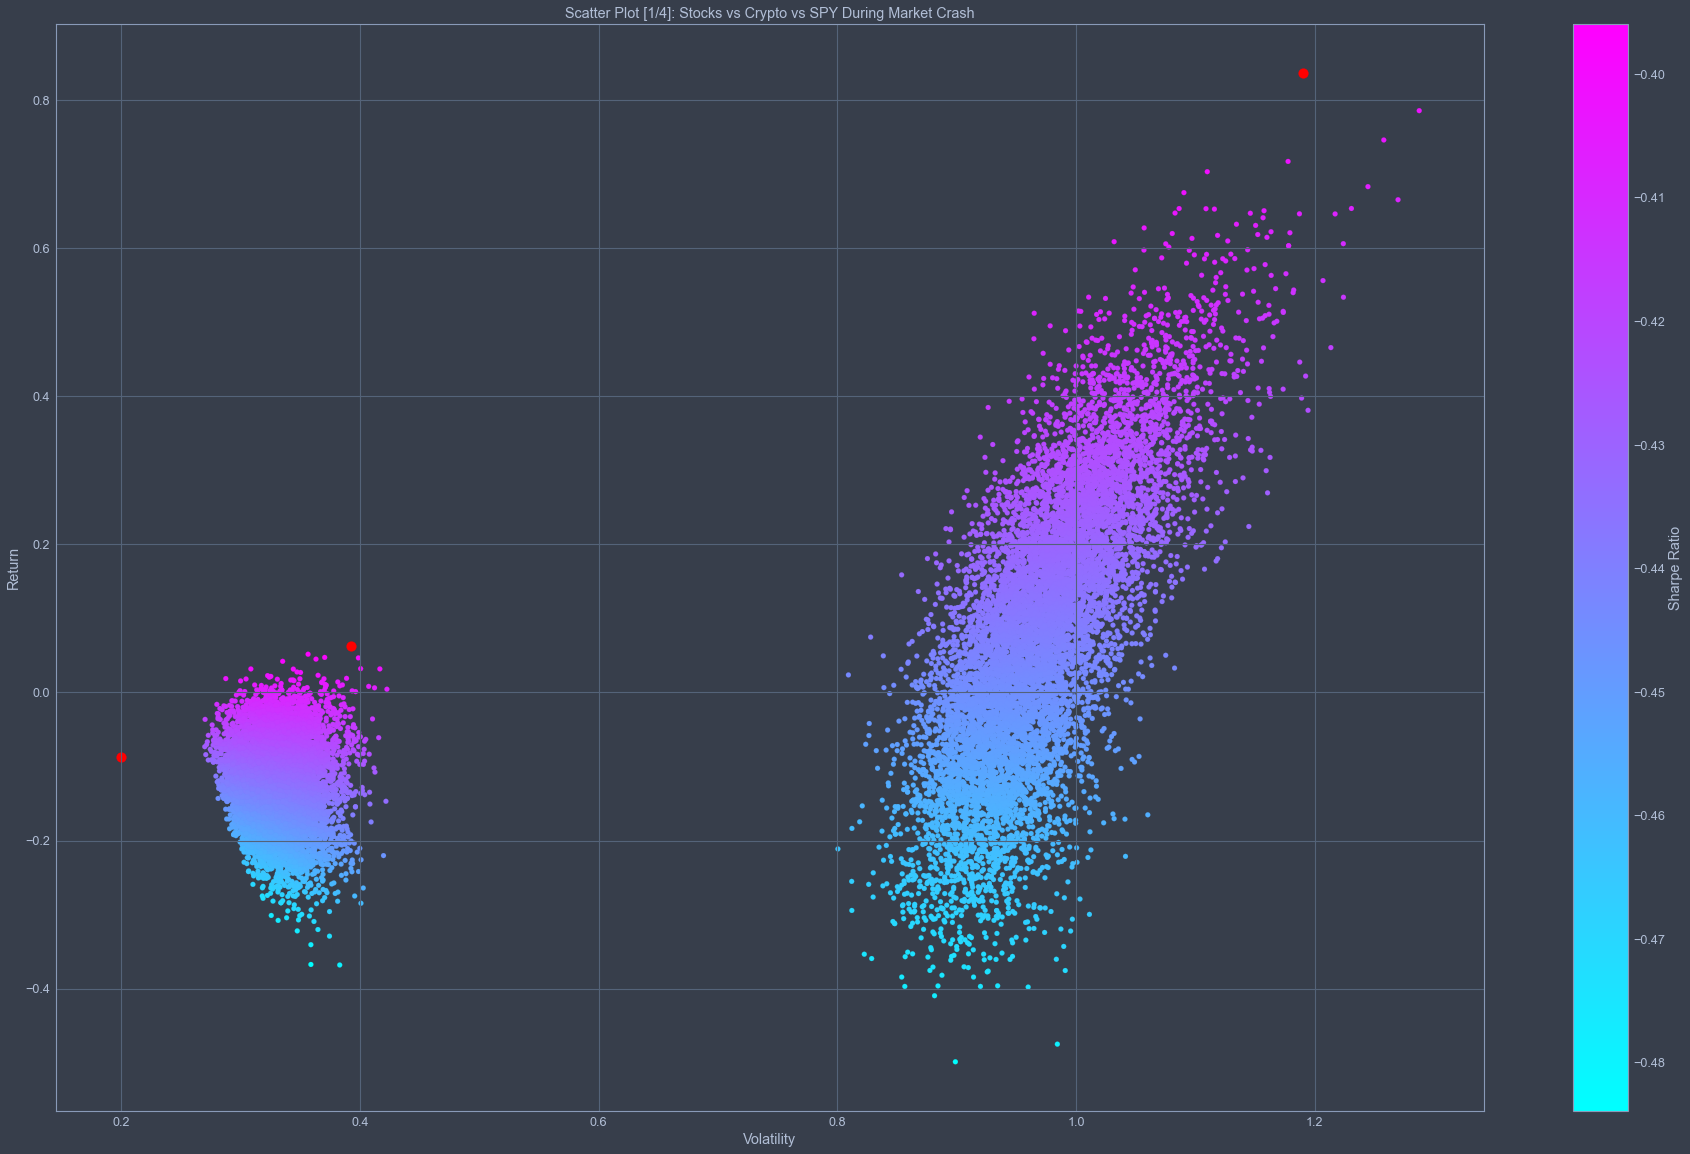

In [216]:
# Plotting our optimal portfolios
st_max_sharpe_return = st_returns_array[st_max_sharpe_index]
st_max_sharpe_volatility = st_volatility_array[st_max_sharpe_index]

cr_max_sharpe_return = cr_returns_array[cr_max_sharpe_index]
cr_max_sharpe_volatility = cr_volatility_array[cr_max_sharpe_index]

spy_max_sharpe_return = spy_returns_array[spy_max_sharpe_index]
spy_max_sharpe_volatility = spy_volatility_array[spy_max_sharpe_index]


# Plotting our heatmap again
plt.figure(figsize=(32,20))
plt.scatter(st_volatility_array, st_returns_array, s=25, c=st_sharpe_array, cmap = 'cool')
plt.scatter(cr_volatility_array, cr_returns_array, s=25, c=cr_sharpe_array, cmap = 'cool')
plt.scatter(spy_volatility_array, spy_returns_array, s=25, c=spy_sharpe_array, cmap = 'cool')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return');
plt.title('Scatter Plot [1/4]: Stocks vs Crypto vs SPY During Market Crash')

# Adding our optimal portfolio as a red dot for ease of reference
plt.scatter(st_max_sharpe_volatility, st_max_sharpe_return, s=100, c='red', edgecolors='red');
plt.scatter(cr_max_sharpe_volatility, cr_max_sharpe_return, s=100, c='red', edgecolors='red');
plt.scatter(spy_max_sharpe_volatility, spy_max_sharpe_return, s=100, c='red', edgecolors='red');

In [217]:
print("Scatter Plot and Line Plot Comparisons for 4 Scenarios in Final Version:",
        "\n[1/4] Stocks vs Crypto vs SPY During Market Surge",
        "\n[2/4] Stocks vs Crypto vs SPY During Market Crash",
        "\n[3/4] Stocks vs Crypto vs SPY During Covid Crash",
        "\n[4/4] Stocks vs Crypto vs SPY During 2021 Q1-Q2 Crash")

Scatter Plot and Line Plot Comparisons for 4 Scenarios in Final Version: 
[1/4] Stocks vs Crypto vs SPY During Market Surge 
[2/4] Stocks vs Crypto vs SPY During Market Crash 
[3/4] Stocks vs Crypto vs SPY During Covid Crash 
[4/4] Stocks vs Crypto vs SPY During 2021 Q1-Q2 Crash
